In [260]:
import sys
sys.path.append('../Utils')
import Solve_Slice
from Solve_Slice import find_B, scatter_pies, solve_V_per_slice, laplacian_from_coords, solve_V_all_slices, find_B_music
from CreateRef import createscRef_py
import anndata as ad
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [261]:
adata = ad.read_h5ad("../Data/spatial.h5ad")   # replace with your filename
adata
spatial_coords = np.vstack([adata.obs['x'], adata.obs['y']])
spatial_coords.shape
center = np.mean( spatial_coords, axis=1 )
center.shape

(2,)

In [289]:
pd_B = pd.DataFrame( data = [[0,1,0], [1,0,0], [0.5,0.0,1.0] ], columns = ['Gene 1','Gene 2','Gene 3'], index=['Type 1','Type 2','Type 3'] )

In [290]:
V_true = np.zeros( (spatial_coords.shape[1], pd_B.shape[0] ) )
V_true.shape

(428, 3)

In [291]:
V_true[:,0] = np.exp( - (spatial_coords[0] - center[0] ) ** 2 / 5 )
V_true[:,1] = np.exp( - (spatial_coords[1] - center[1] ) ** 2 / 5 )
V_true[:,2] = 2 * np.exp( - (spatial_coords[0] - center[0] ) ** 2 / 7 ) * np.exp( - (spatial_coords[1] - center[1] ) ** 2 / 7 )
V_true = V_true / np.mean(V_true, axis=1).reshape(-1,1)

Text(0.5, 1.0, 'True percentage')

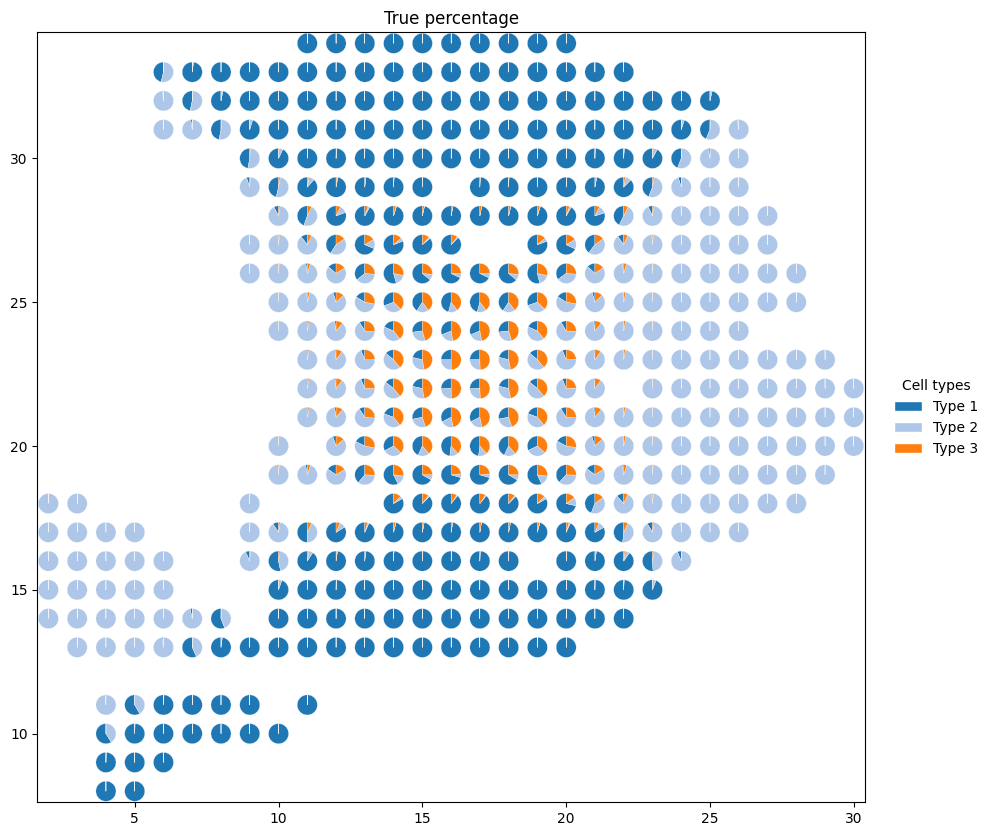

In [292]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))

scatter_pies(ax, adata.obs['x'], adata.obs['y'], V_true, labels=pd_B.index.to_list(),top_n=None)
plt.title('True percentage')

In [297]:
counts = V_true @ pd_B + np.random.rand( V_true.shape[0],pd_B.values.shape[1] ) * 2
counts[ counts < 0] = 0
adata_synthetic = ad.AnnData(counts )
adata_synthetic.obs['x'] = adata.obs['x'].values
adata_synthetic.obs['y'] = adata.obs['y'].values
adata_synthetic.obs_names = [f"Cell_{i:d}" for i in range(adata_synthetic.n_obs)]
adata_synthetic.var_names = [f"Gene {i+1:d}" for i in range(adata_synthetic .n_vars)]

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [298]:
# import scanpy as sc
# import scipy.sparse as sp
# # --- 1) Remove non-finite values in X (works for dense or sparse) ---
# if sp.issparse(adata_synthetic.X):
#     d = adata_synthetic.X.data
#     bad = ~np.isfinite(d)
#     if bad.any():
#         d[bad] = 0.0
# else:
#     adata_synthetic.X = np.nan_to_num(adata_synthetic.X, nan=0.0, posinf=0.0, neginf=0.0)

# # (Optional) also sanitize any layers to be safe
# for lyr in getattr(adata_synthetic, "layers", {}) or {}:
#     Xl = adata_synthetic.layers[lyr]
#     if sp.issparse(Xl):
#         dl = Xl.data
#         badl = ~np.isfinite(dl)
#         if badl.any():
#             dl[badl] = 0.0
#     else:
#         adata_synthetic.layers[lyr] = np.nan_to_num(Xl, nan=0.0, posinf=0.0, neginf=0.0)




In [299]:
V0, Obj, Fit = solve_V_per_slice(adata_synthetic, pd_B, lam=0.1, preprocess=False, return_obj=True)
print('total objective: '+str(Obj))
print('fitting error: '+str(Fit))
print('Penalty: '+str(10*(Obj-Fit)) )

(428, 3)
(3, 3)
iter    0  f=5.866074e+03  rel_drop=1.336e-03  step=1.00e-03
iter   50  f=5.525240e+03  rel_drop=1.059e-03  step=1.00e-03
iter  100  f=5.279920e+03  rel_drop=7.474e-04  step=1.00e-03
iter  150  f=5.123416e+03  rel_drop=4.672e-04  step=1.00e-03
iter  200  f=5.034079e+03  rel_drop=2.574e-04  step=1.00e-03
iter  250  f=4.983950e+03  rel_drop=1.469e-04  step=1.00e-03
iter  300  f=4.954759e+03  rel_drop=9.398e-05  step=1.00e-03
iter  350  f=4.936185e+03  rel_drop=6.011e-05  step=1.00e-03
iter  400  f=4.924259e+03  rel_drop=3.950e-05  step=1.00e-03
iter  450  f=4.916545e+03  rel_drop=2.573e-05  step=1.00e-03
iter  500  f=4.911642e+03  rel_drop=1.531e-05  step=1.00e-03
iter  550  f=4.908562e+03  rel_drop=1.005e-05  step=1.00e-03
iter  552  f=4.908464e+03  rel_drop=9.979e-06  step=1.00e-03
stopped after iteration # 552
stopped after iteration #552
total objective: 4908.464108908735
fitting error: 4902.492735940631
Penalty: 59.71372968104333


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


(428, 3)
(3, 3)
iter    0  f=5.861852e+03  rel_drop=1.332e-03  step=1.00e-03
iter   50  f=5.521991e+03  rel_drop=1.056e-03  step=1.00e-03
iter  100  f=5.276851e+03  rel_drop=7.459e-04  step=1.00e-03
iter  150  f=5.120290e+03  rel_drop=4.671e-04  step=1.00e-03
iter  200  f=5.030446e+03  rel_drop=2.600e-04  step=1.00e-03
iter  250  f=4.979685e+03  rel_drop=1.482e-04  step=1.00e-03
iter  300  f=4.950206e+03  rel_drop=9.481e-05  step=1.00e-03
iter  350  f=4.931187e+03  rel_drop=6.268e-05  step=1.00e-03
iter  400  f=4.918783e+03  rel_drop=4.189e-05  step=1.00e-03
iter  450  f=4.910812e+03  rel_drop=2.650e-05  step=1.00e-03
iter  500  f=4.905770e+03  rel_drop=1.575e-05  step=1.00e-03
iter  550  f=4.902590e+03  rel_drop=1.064e-05  step=1.00e-03
iter  563  f=4.901933e+03  rel_drop=9.784e-06  step=1.00e-03
stopped after iteration # 563
stopped after iteration #563
(428, 3)
(3, 3)
iter    0  f=5.866074e+03  rel_drop=1.336e-03  step=1.00e-03
iter   50  f=5.525240e+03  rel_drop=1.059e-03  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dr

iter  500  f=4.911642e+03  rel_drop=1.531e-05  step=1.00e-03
iter  550  f=4.908562e+03  rel_drop=1.005e-05  step=1.00e-03
iter  552  f=4.908464e+03  rel_drop=9.979e-06  step=1.00e-03
stopped after iteration # 552
stopped after iteration #552
(428, 3)
(3, 3)
iter    0  f=5.872400e+03  rel_drop=1.344e-03  step=1.00e-03
iter   50  f=5.529924e+03  rel_drop=1.061e-03  step=1.00e-03
iter  100  f=5.284330e+03  rel_drop=7.488e-04  step=1.00e-03
iter  150  f=5.127866e+03  rel_drop=4.653e-04  step=1.00e-03
iter  200  f=5.039340e+03  rel_drop=2.570e-04  step=1.00e-03
iter  250  f=4.990160e+03  rel_drop=1.461e-04  step=1.00e-03
iter  300  f=4.961436e+03  rel_drop=9.097e-05  step=1.00e-03
iter  350  f=4.943467e+03  rel_drop=5.646e-05  step=1.00e-03
iter  400  f=4.932127e+03  rel_drop=3.661e-05  step=1.00e-03
iter  450  f=4.924853e+03  rel_drop=2.369e-05  step=1.00e-03
iter  500  f=4.920197e+03  rel_drop=1.502e-05  step=1.00e-03
iter  550  f=4.917207e+03  rel_drop=1.014e-05  step=1.00e-03
iter  551 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dr

iter  400  f=4.944650e+03  rel_drop=3.387e-05  step=1.00e-03
iter  450  f=4.937969e+03  rel_drop=2.120e-05  step=1.00e-03
iter  500  f=4.933767e+03  rel_drop=1.409e-05  step=1.00e-03
iter  540  f=4.931433e+03  rel_drop=9.983e-06  step=1.00e-03
stopped after iteration # 540
stopped after iteration #540
(428, 3)
(3, 3)
iter    0  f=5.903914e+03  rel_drop=1.402e-03  step=1.00e-03
iter   50  f=5.550117e+03  rel_drop=1.076e-03  step=1.00e-03
iter  100  f=5.302902e+03  rel_drop=7.434e-04  step=1.00e-03
iter  150  f=5.147319e+03  rel_drop=4.559e-04  step=1.00e-03
iter  200  f=5.062530e+03  rel_drop=2.359e-04  step=1.00e-03
iter  250  f=5.017921e+03  rel_drop=1.301e-04  step=1.00e-03
iter  300  f=4.992577e+03  rel_drop=7.863e-05  step=1.00e-03
iter  350  f=4.977275e+03  rel_drop=4.724e-05  step=1.00e-03
iter  400  f=4.968012e+03  rel_drop=2.941e-05  step=1.00e-03
iter  450  f=4.962164e+03  rel_drop=1.866e-05  step=1.00e-03
iter  500  f=4.958425e+03  rel_drop=1.205e-05  step=1.00e-03
iter  522 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dr

iter  350  f=5.017275e+03  rel_drop=3.845e-05  step=1.00e-03
iter  400  f=5.009679e+03  rel_drop=2.396e-05  step=1.00e-03
iter  450  f=5.004792e+03  rel_drop=1.623e-05  step=1.00e-03
iter  500  f=5.001441e+03  rel_drop=1.062e-05  step=1.00e-03
iter  507  f=5.001080e+03  rel_drop=9.997e-06  step=1.00e-03
stopped after iteration # 507
stopped after iteration #507
(428, 3)
(3, 3)
iter    0  f=6.068662e+03  rel_drop=2.248e-03  step=1.00e-03
iter   50  f=5.597421e+03  rel_drop=1.164e-03  step=1.00e-03
iter  100  f=5.354646e+03  rel_drop=6.604e-04  step=1.00e-03
iter  150  f=5.224649e+03  rel_drop=3.460e-04  step=1.00e-03
iter  200  f=5.159318e+03  rel_drop=1.720e-04  step=1.00e-03
iter  250  f=5.129631e+03  rel_drop=7.261e-05  step=1.00e-03
iter  300  f=5.115840e+03  rel_drop=3.981e-05  step=1.00e-03
iter  350  f=5.107868e+03  rel_drop=2.467e-05  step=1.00e-03
iter  400  f=5.102588e+03  rel_drop=1.751e-05  step=1.00e-03
iter  450  f=5.098804e+03  rel_drop=1.257e-05  step=1.00e-03
iter  484 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dr

iter  350  f=5.206054e+03  rel_drop=1.821e-05  step=1.00e-03
iter  400  f=5.202205e+03  rel_drop=1.222e-05  step=1.00e-03
iter  430  f=5.200490e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 430
stopped after iteration #430
(428, 3)
(3, 3)
iter    0  f=8.506628e+03  rel_drop=1.597e-01  step=1.00e-03
iter   50  f=5.727407e+03  rel_drop=2.086e-04  step=1.00e-03
iter  100  f=5.691880e+03  rel_drop=7.458e-05  step=1.00e-03
iter  150  f=5.677131e+03  rel_drop=3.634e-05  step=1.00e-03
iter  200  f=5.669384e+03  rel_drop=2.057e-05  step=1.00e-03
iter  250  f=5.664813e+03  rel_drop=1.267e-05  step=1.00e-03
iter  278  f=5.663040e+03  rel_drop=9.931e-06  step=1.00e-03
stopped after iteration # 278
stopped after iteration #278


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:523: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


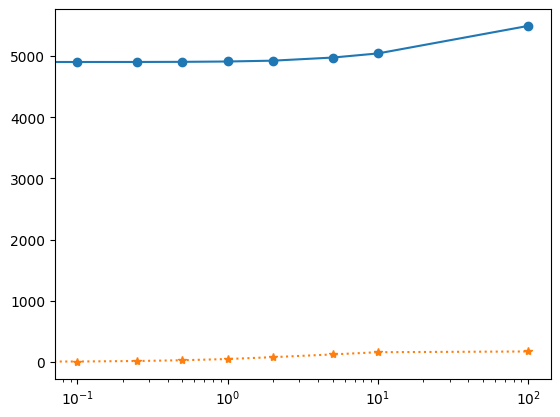

In [300]:
lams = [0.0,0.1,0.25,0.5,1.0,2.0,5.0,10.0,100.0]
V = [0]*len(lams)
Fit_vals, Penalty_vals, V_error = [0]*len(lams), [0]*len(lams),[0]*len(lams)

for (i,lam) in enumerate(lams):
    V[i], Obj, Fit_vals[i] = solve_V_per_slice(adata_synthetic, pd_B, lam=lam, preprocess=False, return_obj=True)
    Penalty_vals[i] = Obj - Fit_vals[i]
    R = V_true - V[i]
    V_error[i] = np.sum( R * R )/R.shape[0]/R.shape[1]


plt.semilogx(lams, Fit_vals, 'o-', label='fitting error')
plt.semilogx(lams, Penalty_vals, '*:', label='penalty')


Text(0.5, 1.0, 'Error in V (optimum in red)')

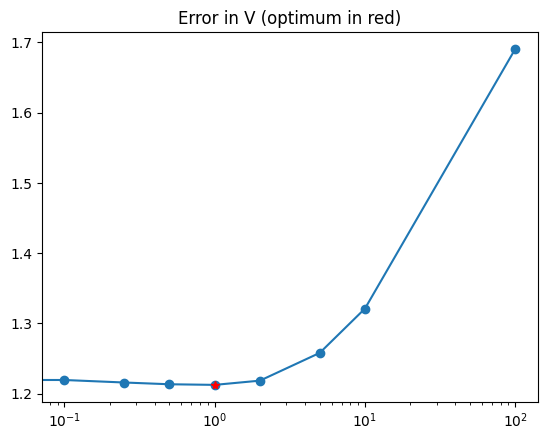

In [301]:
plt.semilogx(lams, V_error,'o-')
id_best = np.where( V_error == np.min(V_error) )[0][0]
plt.semilogx( lams[id_best], V_error[id_best], 'r*')
plt.title('Error in V (optimum in red)')

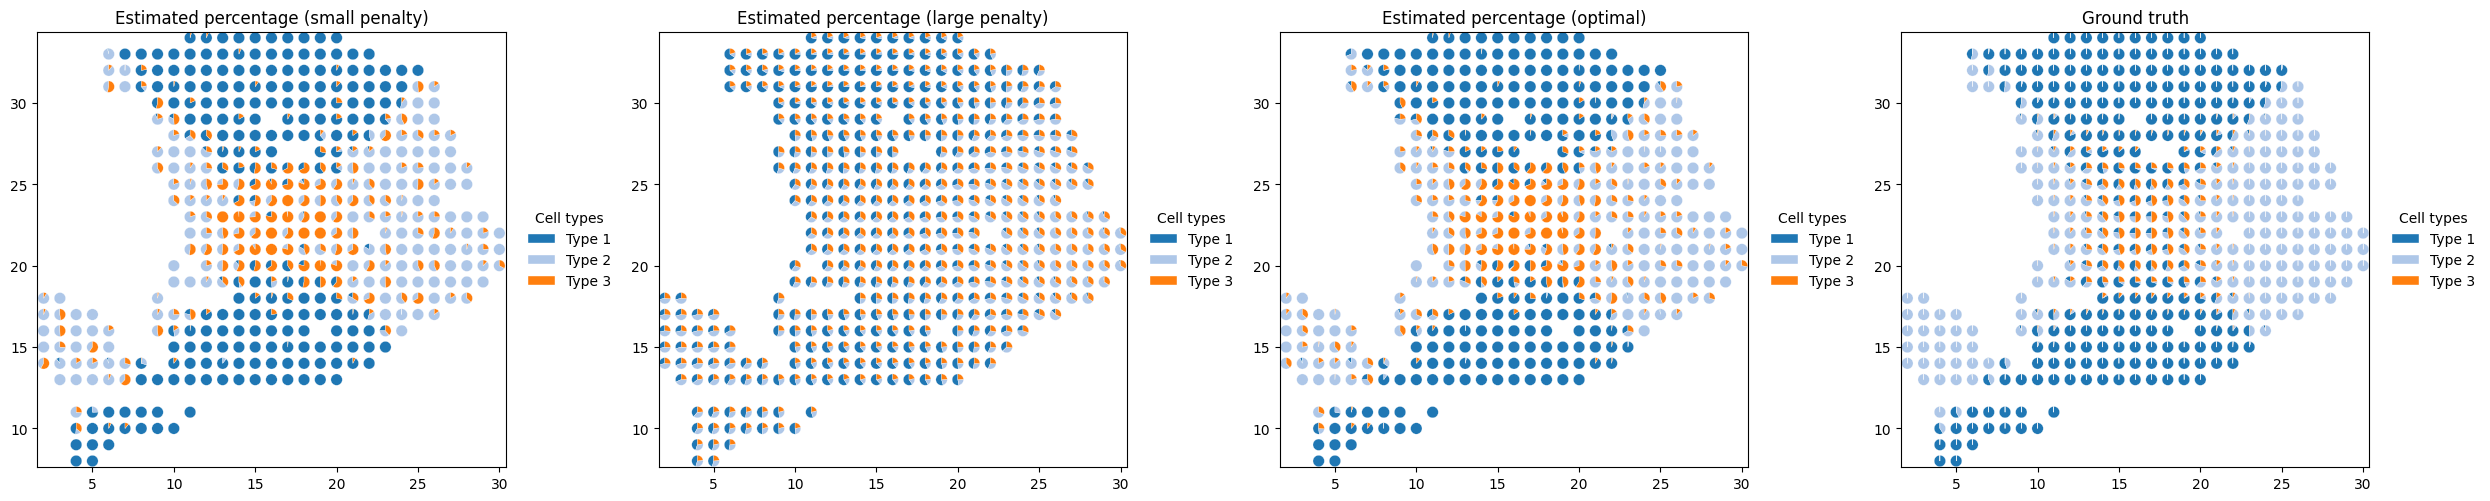

In [302]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4, figsize=(25, 7))
# Left: estimated

scatter_pies(
    axes[0],
    adata.obs['x'],
    adata.obs['y'],
    V[0],
    labels=pd_B.index.to_list(),
    top_n=None
)
axes[0].set_title('Estimated percentage (small penalty)')

scatter_pies(
    axes[1],
    adata.obs['x'],
    adata.obs['y'],
    V[-1],
    labels=pd_B.index.to_list(),
    top_n=None
)
axes[1].set_title('Estimated percentage (large penalty)')

scatter_pies(
    axes[2],
    adata.obs['x'],
    adata.obs['y'],
    V[id_best],
    labels=pd_B.index.to_list(),
    top_n=None
)
axes[2].set_title('Estimated percentage (optimal)')

# Right: ground truth (e.g. V_true)
scatter_pies(
    axes[3],
    adata.obs['x'],
    adata.obs['y'],
    V_true,    # your truth matrix here
    labels=pd_B.index.to_list(),
    top_n=None
)
axes[3].set_title('Ground truth')

plt.tight_layout()
plt.show()

# Now try something with a temporal evolution.

In [303]:
lower_left = [0,0]
upper_right = [30,30]
t = [0,1,2,3]

In [304]:
V_true_temporal = [0]*len(t)
for i in t:
    print(i)
    V_true_temporal[i] = np.zeros(V_true.shape)
    V_true_temporal[i][:,0] = np.exp( - (spatial_coords[0] - ( i/3*center[0] + (1-i/3)*lower_left[0])  ) ** 2 / 5 )
    V_true_temporal[i][:,1] = np.exp( - (spatial_coords[1] - ( i/3*center[1] + (1-i/3)*lower_left[1])) ** 2 / 5 )
    V_true_temporal[i][:,2] = 2*np.exp( - (spatial_coords[0] - center[0] ) ** 2 / 7 ) * np.exp( - (spatial_coords[1] - center[1] ) ** 2 / 7 )
    V_true_temporal[i] = V_true_temporal[i] / np.mean(V_true_temporal[i], axis=1).reshape(-1,1)

0
1
2
3


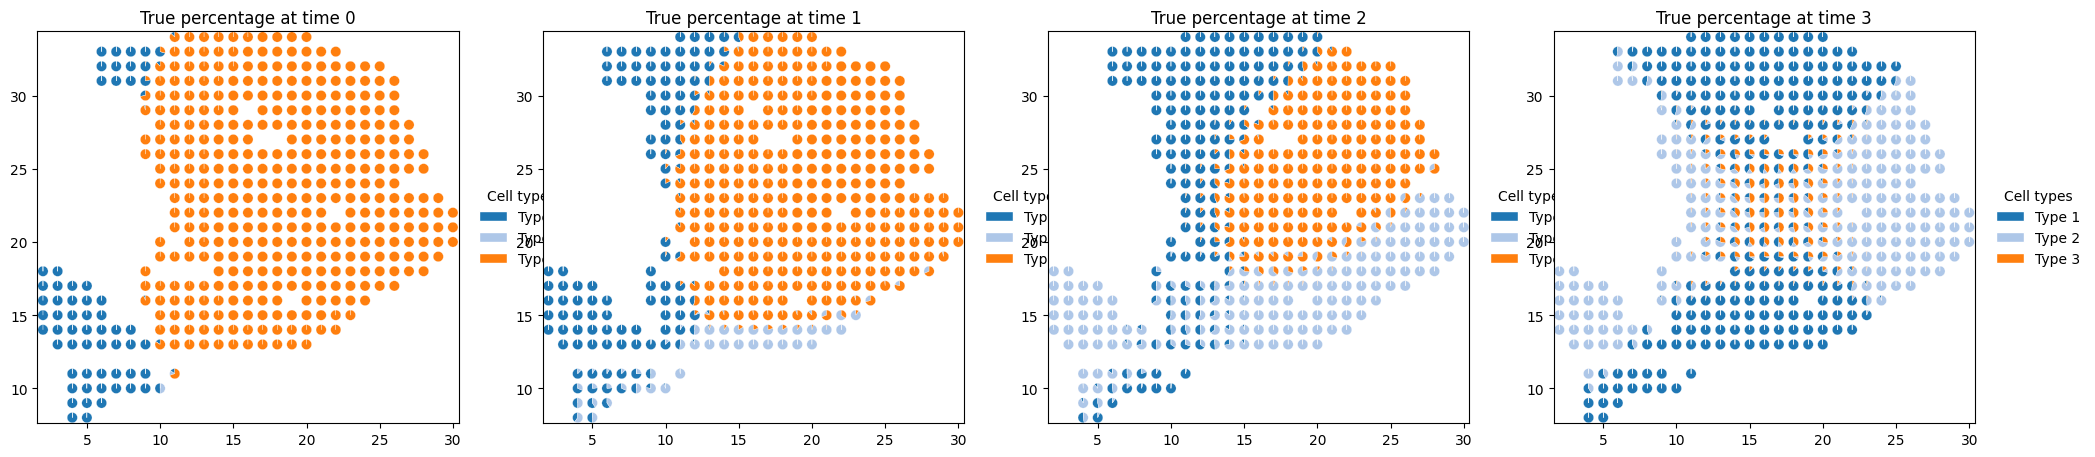

In [305]:
fig, axes = plt.subplots(1, 4, figsize=(25, 7))
# Left: estimated
for i in range(4):
    scatter_pies(
        axes[i],
        adata.obs['x'],
        adata.obs['y'],
        V_true_temporal[i],
        labels=pd_B.index.to_list(),
        top_n=None
    )
    axes[i].set_title('True percentage at time '+str(i))
plt.show()

In [306]:

adata_synthetic_temp = [0]*len(t)
for i in t:
    counts = V_true_temporal[i] @ pd_B + np.random.rand( V_true_temporal[i].shape[0],pd_B.values.shape[1] ) * 2
    counts[ counts < 0] = 0
    print(counts.shape)
    adata_synthetic_temp[i] = ad.AnnData(counts )
    adata_synthetic_temp[i].obs['x'] = adata.obs['x'].values
    adata_synthetic_temp[i].obs['y'] = adata.obs['y'].values
    adata_synthetic_temp[i].obs_names = [f"Cell_{i+1:d}" for i in range(adata_synthetic.n_obs)]
    adata_synthetic_temp[i].var_names = [f"Gene {i+1:d}" for i in range(adata_synthetic .n_vars)]

(428, 3)
(428, 3)
(428, 3)
(428, 3)


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [307]:
adata_synthetic_temp[0].var_names

Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')

In [308]:
pd_B

,Gene 1,Gene 2,Gene 3
Type 1,0.0,1.0,0.0
Type 2,1.0,0.0,0.0
Type 3,0.5,0.0,1.0


In [309]:
coupling = [0]*3
for i in range(3):
    coupling[i] = np.eye( 428 )

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129469e+03  rel_drop=1.038e-05  step=1.00e-03
iter  454  f=6.129219e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iteration # 454
stopped after iteration #454
(428, 3)
(3, 3)
iter    0  f=7.366303e+03  rel_drop=1.799e-03  step=1.00e-03
iter   50  f=6.786108e+03  rel_drop=1.458e-03  step=1.00e-03
iter  100  f=6.378169e+03  rel_drop=1.016e-03  step=1.00e-03
i

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 507
stopped after iteration #507
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130412e+03  rel_drop=9.982e-06  step=1.00e-03
stopped after iteration # 449
stopped after iteration #449
(428, 3)
(3, 3)
iter    0  f=7.370516e+03  rel_drop=1.804e-03  step=1.00e-03
iter   50  f=6.788721e+03  rel_drop=1.461e-03  step=1.00e-03
iter  100  f=6.380025e+03  rel_drop=1.015e-03  step=1.00e-03
iter  150  f=6.133737e+03  rel_drop=6.071e-04  step=1.00e-03
iter  200  f=5.996978e+03  rel_drop=3.160e-04  step=1.00e-03
iter  250  f=5.932999e+03  rel_drop=1.452e-04  step=1.00e-03
iter  300  f=5.904199e+03  rel_drop=7.142e-05  step=1.00e-03
iter  350  f=5.890432e+03  rel_drop=2.959e-05  step=1.00e-03
iter  400  f=5.883766e+03  rel_drop=1.676e-05  step=1.00e-03
iter  448  f=5.880082e+03  rel_drop=9.881e-06  step=1.00e-03
stopped after iteration # 448
stopped after iteration #448
(428, 3)
(3, 3)
iter    0  f=6.556281e+03  rel_drop=1.526e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 500
stopped after iteration #500
(1712, 3)
(3, 3)
stopped after iteration # 501
stopped after iteration #501
(1712, 3)
(3, 3)
stopped after iteration # 501
stopped after iteration #501
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=1.013e-03  step=1.00e-03
iter  150  f=6.140599e+03  rel_drop=6.079e-04  step=1.00e-03
iter  200  f=6.005026e+03  rel_drop=3.111e-04  step=1.00e-03
iter  250  f=5.942448e+03  rel_drop=1.289e-04  step=1.00e-03
iter  300  f=5.915480e+03  rel_drop=6.161e-05  step=1.00e-03
iter  350  f=5.904061e+03  rel_drop=2.585e-05  step=1.00e-03
iter  400  f=5.898668e+03  rel_drop=1.265e-05  step=1.00e-03
iter  413  f=5.897826e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 413
stopped after iteration #413
(428, 3)
(3, 3)
iter    0  f=6.573133e+03  rel_drop=1.546e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 474
stopped after iteration #474
(1712, 3)
(3, 3)
stopped after iteration # 475
stopped after iteration #475
(1712, 3)
(3, 3)
stopped after iteration # 475
stopped after iteration #475
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
stopped after iteration # 391
stopped after iteration #391
(428, 3)
(3, 3)
iter    0  f=7.408275e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=6.808356e+03  rel_drop=1.496e-03  step=1.00e-03
iter  100  f=6.393150e+03  rel_drop=1.012e-03  step=1.00e-03
iter  150  f=6.148301e+03  rel_drop=5.966e-04  step=1.00e-03
iter  200  f=6.014249e+03  rel_drop=2.948e-04  step=1.00e-03
iter  250  f=5.953985e+03  rel_drop=1.237e-04  step=1.00e-03
iter  300  f=5.929442e+03  rel_drop=4.834e-05  step=1.00e-03
iter  350  f=5.920344e+03  rel_drop=2.096e-05  step=1.00e-03
iter  389  f=5.916982e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iteration # 389
stopped after iteration #389
(428, 3)
(3, 3)
iter    0  f=6.594119e+03  rel_drop=1.584e-03  step=1.00e-03
iter   50  f=6.146282e+03  rel_drop=1.218e-03  step=1.00e-03
iter  100  f=5.839002e+03  rel_drop=8.199e-04  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350  f=4.859529e+03  rel_drop=4.565e-05  step=1.00e-03
iter  400  f=4.850584e+03  rel_drop=2.870e-05  step=1.00e-03
iter  450  f=4.844894e+03  rel_drop=1.878e-05  step=1.00e-03
iter  500  f=4.841070e+03  rel_drop=1.314e-05  step=1.00e-03
iter  529  f=4.839449e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 529
stopped after iteration #529
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter 

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter  100  f=6.402376e+03  rel_drop=1.003e-03  step=1.00e-03
iter  150  f=6.162304e+03  rel_drop=5.922e-04  step=1.00e-03
iter  200  f=6.030387e+03  rel_drop=2.900e-04  step=1.00e-03
iter  250  f=5.974087e+03  rel_drop=1.140e-04  step=1.00e-03
iter  300  f=5.954934e+03  rel_drop=3.373e-05  step=1.00e-03
iter  350  f=5.948664e+03  rel_drop=1.016e-05  step=1.00e-03
iter  351  f=5.948605e+03  rel_drop=9.851e-06  step=1.00e-03
stopped after iteration # 351
stopped after iteration #351
(428, 3)
(3, 3)
iter    0  f=6.635830e+03  rel_drop=1.697e-03  step=1.00e-03
iter   50  f=6.163795e+03  rel_drop=1.259e-03  step=1.00e-03
iter  100  f=5.851017e+03  rel_drop=8.149e-04  step=1.00e-03
iter  150  f=5.672165e+03  rel_drop=4.620e-04  step=1.00e-03
iter  200  f=5.576792e+03  rel_drop=2.356e-04  step=1.00e-03
iter  250  f=5.530842e+03  rel_drop=1.085e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450  f=4.888231e+03  rel_drop=1.597e-05  step=1.00e-03
iter  500  f=4.885013e+03  rel_drop=1.101e-05  step=1.00e-03
iter  510  f=4.884499e+03  rel_drop=9.988e-06  step=1.00e-03
stopped after iteration # 510
stopped after iteration #510
(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter 

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.840859e+03  rel_drop=1.622e-03  step=1.00e-03
iter  100  f=6.417709e+03  rel_drop=9.139e-04  step=1.00e-03
iter  150  f=6.202973e+03  rel_drop=5.323e-04  step=1.00e-03
iter  200  f=6.072427e+03  rel_drop=2.877e-04  step=1.00e-03
iter  250  f=6.021392e+03  rel_drop=8.049e-05  step=1.00e-03
iter  300  f=6.008640e+03  rel_drop=1.935e-05  step=1.00e-03
iter  337  f=6.005626e+03  rel_drop=9.918e-06  step=1.00e-03
stopped after iteration # 337
stopped after iteration #337
(428, 3)
(3, 3)
iter    0  f=6.758868e+03  rel_drop=2.339e-03  step=1.00e-03
iter   50  f=6.186890e+03  rel_drop=1.349e-03  step=1.00e-03
iter  100  f=5.873817e+03  rel_drop=7.665e-04  step=1.00e-03
iter  150  f=5.716031e+03  rel_drop=3.865e-04  step=1.00e-03
iter  200  f=5.635063e+03  rel_drop=1.980e-04  step=1.00e-03
iter  250  f=5.598178e+03  rel_drop=7.345e-05  step=1.00e-03
iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=8.138333e+03  rel_drop=4.249e-03  step=1.00e-03
iter   50  f=7.156500e+03  rel_drop=1.704e-03  step=1.00e-03
iter  100  f=6.686009e+03  rel_drop=1.011e-03  step=1.00e-03
iter  150  f=6.451360e+03  rel_drop=5.658e-04  step=1.00e-03
iter  200  f=6.289726e+03  rel_drop=4.261e-04  step=1.00e-03
iter 

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  200  f=6.128123e+03  rel_drop=3.250e-04  step=1.00e-03
iter  250  f=6.074951e+03  rel_drop=7.595e-05  step=1.00e-03
iter  300  f=6.062824e+03  rel_drop=2.075e-05  step=1.00e-03
iter  349  f=6.058523e+03  rel_drop=9.906e-06  step=1.00e-03
stopped after iteration # 349
stopped after iteration #349
(428, 3)
(3, 3)
iter    0  f=6.956991e+03  rel_drop=4.349e-03  step=1.00e-03
iter   50  f=6.189468e+03  rel_drop=1.303e-03  step=1.00e-03
iter  100  f=5.907357e+03  rel_drop=6.384e-04  step=1.00e-03
iter  150  f=5.778937e+03  rel_drop=3.099e-04  step=1.00e-03
iter  200  f=5.712346e+03  rel_drop=1.742e-04  step=1.00e-03
iter  250  f=5.679674e+03  rel_drop=6.214e-05  step=1.00e-03
iter  300  f=5.670521e+03  rel_drop=1.639e-05  step=1.00e-03
iter  333  f=5.668157e+03  rel_drop=9.926e-06  step=1.00e-03
stopped after iteration # 333
stopped after iteration #333
(428, 3)
(3, 3)
iter    0  f=6.160215e+03  rel_drop=4.620e-03  step=1.00e-03
iter   50  f=5.486547e+03  rel_drop=1.132e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 342
stopped after iteration #342
(1712, 3)
(3, 3)
stopped after iteration # 342
stopped after iteration #342
(1712, 3)
(3, 3)
stopped after iteration # 342
stopped after iteration #342
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=1.037808e+04  rel_drop=1.352e-01  step=1.00e-03
iter   50  f=7.215517e+03  rel_drop=1.219e-03  step=1.00e-03
iter  100  f=6.833770e+03  rel_drop=8.970e-04  step=1.00e-03
iter  150  f=6.621271e+03  rel_drop=5.090e-04  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  200  f=6.472659e+03  rel_drop=4.029e-04  step=1.00e-03
iter  250  f=6.410579e+03  rel_drop=1.782e-05  step=1.00e-03
iter  258  f=6.409942e+03  rel_drop=9.443e-06  step=1.00e-03
stopped after iteration # 258
stopped after iteration #258
(428, 3)
(3, 3)
iter    0  f=1.000335e+04  rel_drop=1.401e-01  step=1.00e-03
iter   50  f=6.940649e+03  rel_drop=9.190e-04  step=1.00e-03
iter  100  f=6.675140e+03  rel_drop=5.885e-04  step=1.00e-03
iter  150  f=6.533856e+03  rel_drop=3.555e-04  step=1.00e-03
iter  200  f=6.428655e+03  rel_drop=2.941e-04  step=1.00e-03
iter  250  f=6.360404e+03  rel_drop=1.313e-04  step=1.00e-03
iter  300  f=6.334470e+03  rel_drop=4.238e-05  step=1.00e-03
iter  350  f=6.326968e+03  rel_drop=1.121e-05  step=1.00e-03
iter  355  f=6.326641e+03  rel_drop=9.783e-06  step=1.00e-03
stopped after iteration # 355
stopped after iteration #355
(428, 3)
(3, 3)
iter    0  f=9.196931e+03  rel_drop=1.496e-01  step=1.00e-03
iter   50  f=6.317105e+03  rel_drop=5.112e-04  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  150  f=5.566851e+03  rel_drop=3.605e-05  step=1.00e-03
iter  200  f=5.559412e+03  rel_drop=1.969e-05  step=1.00e-03
iter  250  f=5.555163e+03  rel_drop=1.195e-05  step=1.00e-03
iter  271  f=5.553895e+03  rel_drop=9.963e-06  step=1.00e-03
stopped after iteration # 271
stopped after iteration #271
(1712, 3)
(3, 3)
stopped after iteration # 336
stopped after iteration #336
(1712, 3)
(3, 3)
stopped after iteration # 336
stopped after iteration #336
(1712, 3)
(3, 3)
stopped after iteration # 336
stopped after iteration #336
stopped after iteration # 2


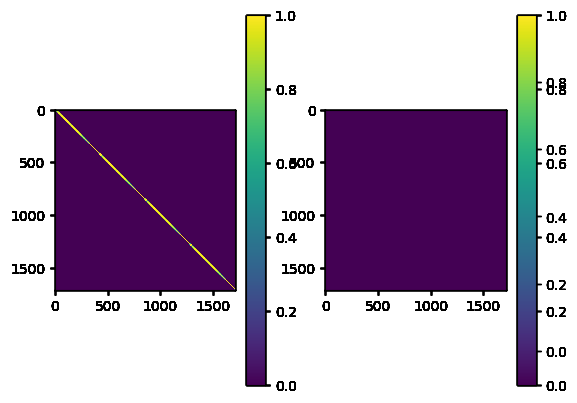

In [310]:
lams = [0.0,0.1,0.25,0.5,1.0,2.0,5.0,10.0,100.0]
V_temp = [0]*len(lams)
V_temp_error = [0]*len(lams)

for (i,lam) in enumerate(lams):
    V_temp[i],_,_ = solve_V_all_slices(adata_synthetic_temp, pd_B, lam=lam, mu=.1, time=None, outer_max=5, niter_max=1e3, tol=1e-5, eta = 1e-3, verbose=False, preprocess=False, coupling=coupling)
    for j in t:
        R = V_temp[i][j] - V_true_temporal[j]
        V_temp_error[i] += np.sum(  R * R )/R.shape[0]/R.shape[1]


Text(0.5, 1.0, 'Error in V (optimum in red)')

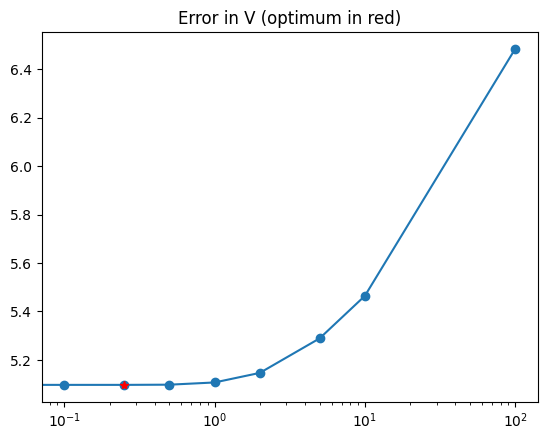

In [311]:
plt.semilogx(lams, V_temp_error,'o-')
id_best = np.where( V_temp_error == np.min(V_temp_error) )[0][0]
plt.semilogx( lams[id_best], V_temp_error[id_best], 'r*')
plt.title('Error in V (optimum in red)')

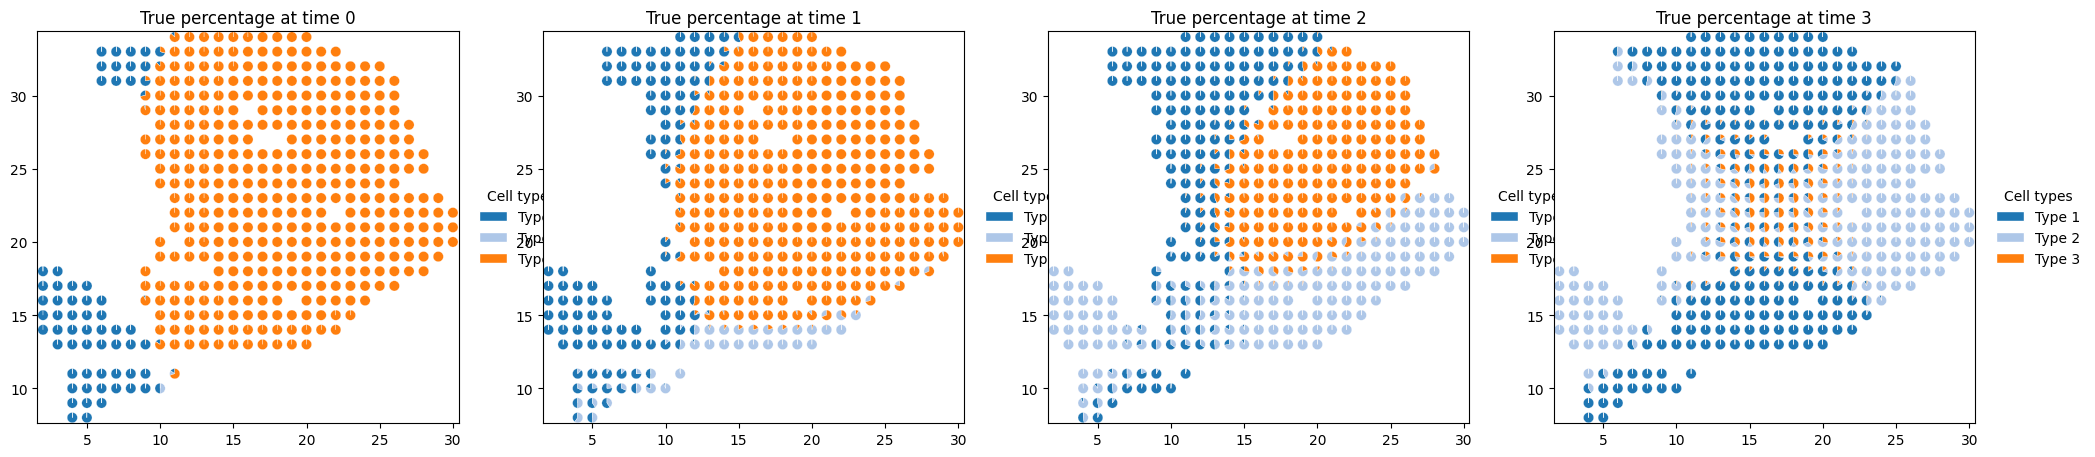

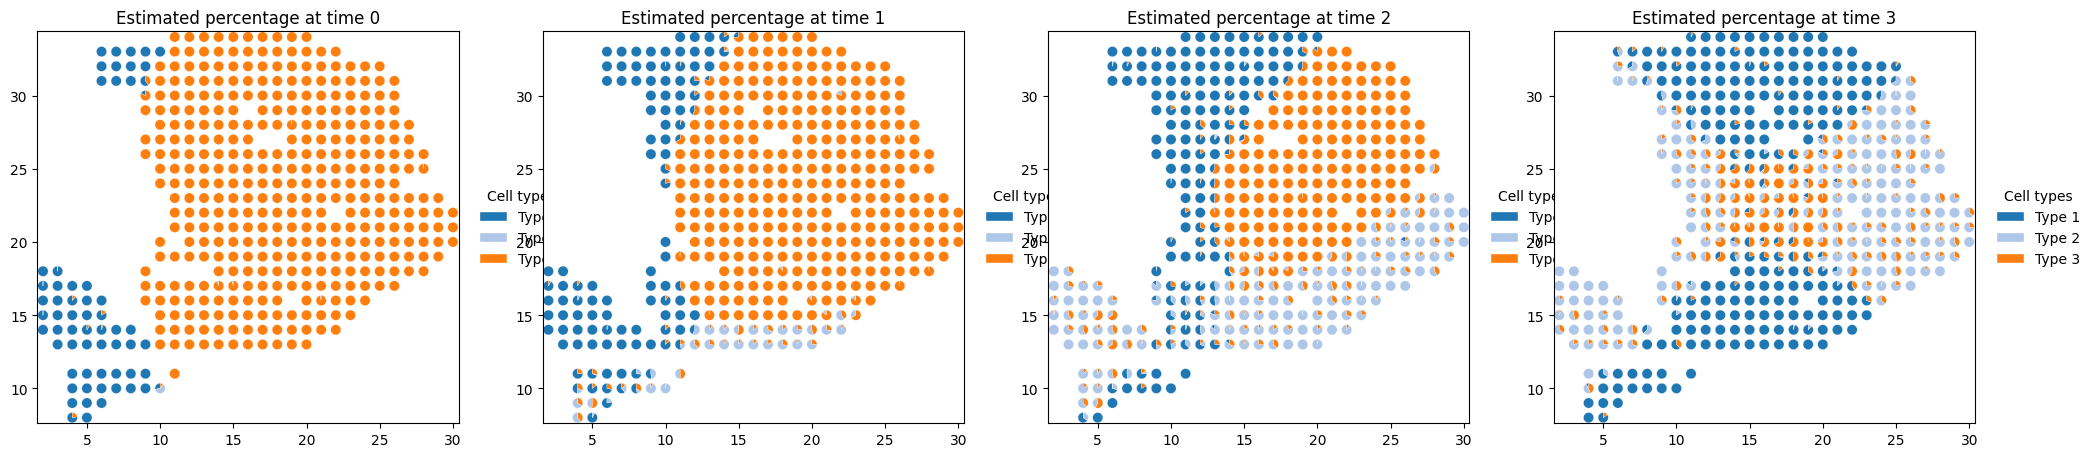

(428, 3)
(3, 3)
stopped after iteration # 391
stopped after iteration #391


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


(428, 3)
(3, 3)
stopped after iteration # 389
stopped after iteration #389


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


(428, 3)
(3, 3)
stopped after iteration # 480
stopped after iteration #480


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


(428, 3)
(3, 3)
stopped after iteration # 529
stopped after iteration #529


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


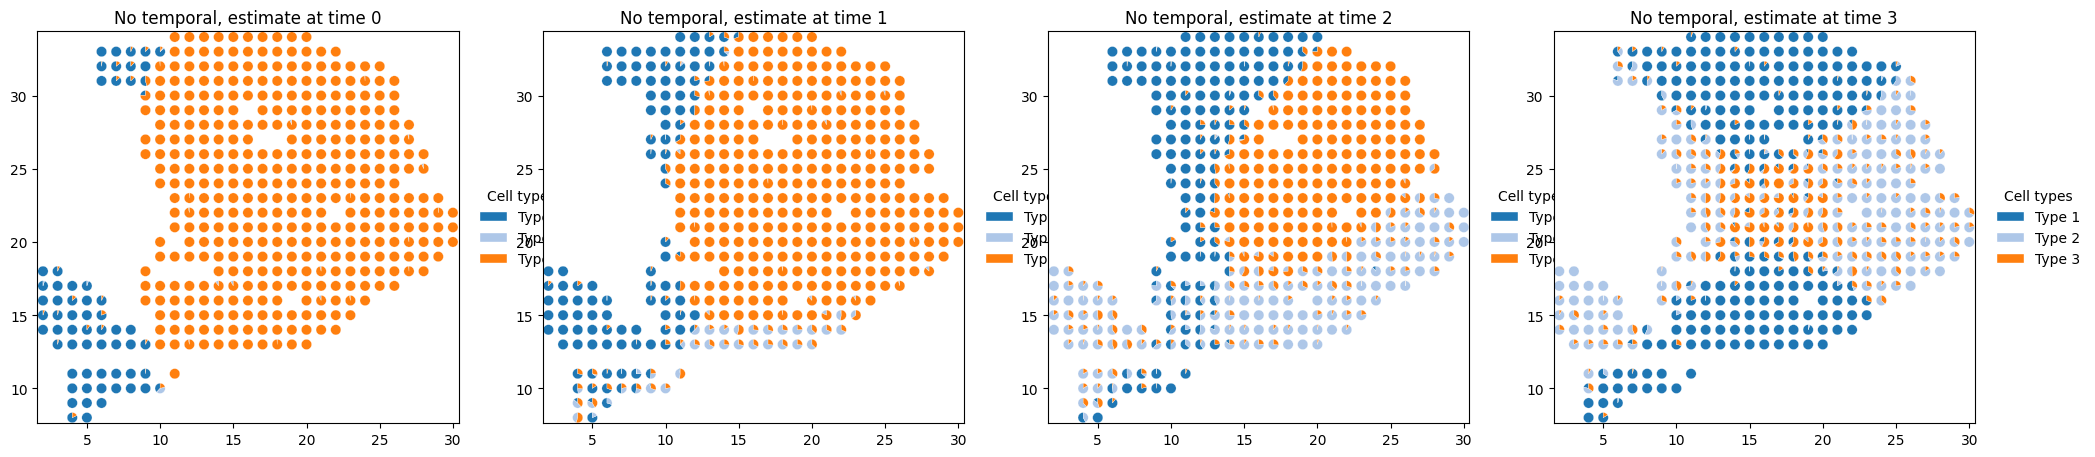

In [312]:
fig, axes = plt.subplots(1, 4, figsize=(25, 7))
# Left: estimated
for i in range(4):
    scatter_pies(
        axes[i],
        adata.obs['x'],
        adata.obs['y'],
        V_true_temporal[i],
        labels=pd_B.index.to_list(),
        top_n=None
    )
    axes[i].set_title('True percentage at time '+str(i))
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(25, 7))
# Left: estimated
for i in range(4):
    scatter_pies(
        axes[i],
        adata.obs['x'],
        adata.obs['y'],
        V_temp[id_best][i],
        labels=pd_B.index.to_list(),
        top_n=None
    )
    axes[i].set_title('Estimated percentage at time '+str(i))
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(25, 7))
for i in range(4):
    V_current = solve_V_per_slice(adata_synthetic_temp[i], pd_B, lam=1., preprocess=False, verbose=False)
    scatter_pies(
        axes[i],
        adata.obs['x'],
        adata.obs['y'],
        V_current,
        labels=pd_B.index.to_list(),
        top_n=None
    )
    axes[i].set_title('No temporal, estimate at time '+str(i))
plt.show()

## Try a 2D grid to include mu:

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129469e+03  rel_drop=1.038e-05  step=1.00e-03
iter  454  f=6.129219e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iteration # 454
stopped after iteration #454
(428, 3)
(3, 3)
iter    0  f=7.366303e+03  rel_drop=1.799e-03  step=1.00e-03
iter   50  f=6.786108e+03  rel_drop=1.458e-03  step=1.00e-03
iter  100  f=6.378169e+03  rel_drop=1.016e-03  step=1.00e-03
i

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 509
stopped after iteration #509
(1712, 3)
(3, 3)
stopped after iteration # 509
stopped after iteration #509
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129469e+03  rel_drop=1.038e-05  step=1.00e-03
iter  454  f=6.129219e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iteration # 454
stopped after iteration #454
(428, 3)
(3, 3)
iter

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.446165e+03  rel_drop=8.555e-05  step=1.00e-03
iter  350  f=5.428601e+03  rel_drop=5.141e-05  step=1.00e-03
iter  400  f=5.417288e+03  rel_drop=3.390e-05  step=1.00e-03
iter  450  f=5.410190e+03  rel_drop=2.086e-05  step=1.00e-03
iter  500  f=5.405552e+03  rel_drop=1.378e-05  step=1.00e-03
iter  540  f=5.403062e+03  rel_drop=9.990e-06  step=1.00e-03
stopped after iteration # 540
stopped after iteration #540
(428, 3)
(3, 3)
iter    0  f=5.755464e+03  rel_drop=1.390e-03  step=1.00e-03
iter   50  f=5.409916e+03  rel_drop=1.086e-03  step=1.00e-03
iter  100  f=5.161672e+03  rel_drop=7.833e-04  step=1.00e-03
iter  150  f=5.004793e+03  rel_drop=4.847e-04  step=1.00e-03
iter  200  f=4.914502e+03  rel_drop=2.810e-04  step=1.00e-03
iter  250  f=4.861396e+03  rel_drop=1.647e-04  step=1.00e-03
iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 510
stopped after iteration #510
(1712, 3)
(3, 3)
stopped after iteration # 510
stopped after iteration #510
(1712, 3)
(3, 3)
stopped after iteration # 510
stopped after iteration #510
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129469e+03  rel_drop=1.038e-05  step=1.00e-03
iter  454  f=6.129219e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iterat

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.446165e+03  rel_drop=8.555e-05  step=1.00e-03
iter  350  f=5.428601e+03  rel_drop=5.141e-05  step=1.00e-03
iter  400  f=5.417288e+03  rel_drop=3.390e-05  step=1.00e-03
iter  450  f=5.410190e+03  rel_drop=2.086e-05  step=1.00e-03
iter  500  f=5.405552e+03  rel_drop=1.378e-05  step=1.00e-03
iter  540  f=5.403062e+03  rel_drop=9.990e-06  step=1.00e-03
stopped after iteration # 540
stopped after iteration #540
(428, 3)
(3, 3)
iter    0  f=5.755464e+03  rel_drop=1.390e-03  step=1.00e-03
iter   50  f=5.409916e+03  rel_drop=1.086e-03  step=1.00e-03
iter  100  f=5.161672e+03  rel_drop=7.833e-04  step=1.00e-03
iter  150  f=5.004793e+03  rel_drop=4.847e-04  step=1.00e-03
iter  200  f=4.914502e+03  rel_drop=2.810e-04  step=1.00e-03
iter  250  f=4.861396e+03  rel_drop=1.647e-04  step=1.00e-03
iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 507
stopped after iteration #507
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129469e+03  rel_drop=1.038e-05  step=1.00e-03
iter  454  f=6.129219e+03  rel_drop=9.976e-06  step=1.00e-03
stopped after iteration # 454
stopped after iteration #454
(428, 3)
(3, 3)
iter    0  f=7.366303e+03  rel_drop=1.799e-03  step=1.00e-03
iter   50  f=6.786108e+03  rel_drop=1.458e-03  step=1.00e-03
iter  100  f=6.378169e+03  rel_drop=1.016e-03  step=1.00e-03
iter  150  f=6.131861e+03  rel_drop=6.121e-04  step=1.00e-03
iter  200  f=5.994921e+03  rel_drop=3.130e-04  step=1.00e-03
iter  250  f=5.930654e+03  rel_drop=1.503e-04  step=1.00e-03
iter  300  f=5.901377e+03  rel_drop=7.201e-05  step=1.00e-03
iter  350  f=5.886991e+03  rel_drop=3.143e-05  step=1.00e-03
iter  400  f=5.879904e+03  rel_drop=1.815e-05  step=1.00e-03
iter  450  f=5.875798e+03  rel_drop=1.052e-05  step=1.00e-03
iter  461  f=5.875139e+03  rel_drop=9.727e-06  step=1.00e-03
stopped after iteration # 461
stopped after iteration #461
(428, 3)
(3,

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  150  f=5.004793e+03  rel_drop=4.847e-04  step=1.00e-03
iter  200  f=4.914502e+03  rel_drop=2.810e-04  step=1.00e-03
iter  250  f=4.861396e+03  rel_drop=1.647e-04  step=1.00e-03
iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450  f=4.793921e+03  rel_drop=2.519e-05  step=1.00e-03
iter  500  f=4.788951e+03  rel_drop=1.637e-05  step=1.00e-03
iter  550  f=4.785590e+03  rel_drop=1.227e-05  step=1.00e-03
iter  582  f=4.783898e+03  rel_drop=9.901e-06  step=1.00e-03
stopped after iteration # 582
stopped after iteration #582
(1712, 3)
(3, 3)
stopped after iteration # 507
stopped after iteration #507
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
(1712, 3)
(3, 3)
stopped after iteration # 508
stopped after iteration #508
(1712, 3)
(3, 3)
stopped af

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.446165e+03  rel_drop=8.555e-05  step=1.00e-03
iter  350  f=5.428601e+03  rel_drop=5.141e-05  step=1.00e-03
iter  400  f=5.417288e+03  rel_drop=3.390e-05  step=1.00e-03
iter  450  f=5.410190e+03  rel_drop=2.086e-05  step=1.00e-03
iter  500  f=5.405552e+03  rel_drop=1.378e-05  step=1.00e-03
iter  540  f=5.403062e+03  rel_drop=9.990e-06  step=1.00e-03
stopped after iteration # 540
stopped after iteration #540
(428, 3)
(3, 3)
iter    0  f=5.755464e+03  rel_drop=1.390e-03  step=1.00e-03
iter   50  f=5.409916e+03  rel_drop=1.086e-03  step=1.00e-03
iter  100  f=5.161672e+03  rel_drop=7.833e-04  step=1.00e-03
iter  150  f=5.004793e+03  rel_drop=4.847e-04  step=1.00e-03
iter  200  f=4.914502e+03  rel_drop=2.810e-04  step=1.00e-03
iter  250  f=4.861396e+03  rel_drop=1.647e-04  step=1.00e-03
iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 531
stopped after iteration #531
(1712, 3)
(3, 3)
stopped after iteration # 532
stopped after iteration #532
(1712, 3)
(3, 3)
stopped after iteration # 533
stopped after iteration #533
(1712, 3)
(3, 3)
stopped after iteration # 533
stopped after iteration #533
(1712, 3)
(3, 3)
stopped after iteration # 533
stopped after iteration #533
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.446165e+03  rel_drop=8.555e-05  step=1.00e-03
iter  350  f=5.428601e+03  rel_drop=5.141e-05  step=1.00e-03
iter  400  f=5.417288e+03  rel_drop=3.390e-05  step=1.00e-03
iter  450  f=5.410190e+03  rel_drop=2.086e-05  step=1.00e-03
iter  500  f=5.405552e+03  rel_drop=1.378e-05  step=1.00e-03
iter  540  f=5.403062e+03  rel_drop=9.990e-06  step=1.00e-03
stopped after iteration # 540
stopped after iteration #540
(428, 3)
(3, 3)
iter    0  f=5.755464e+03  rel_drop=1.390e-03  step=1.00e-03
iter   50  f=5.409916e+03  rel_drop=1.086e-03  step=1.00e-03
iter  100  f=5.161672e+03  rel_drop=7.833e-04  step=1.00e-03
iter  150  f=5.004793e+03  rel_drop=4.847e-04  step=1.00e-03
iter  200  f=4.914502e+03  rel_drop=2.810e-04  step=1.00e-03
iter  250  f=4.861396e+03  rel_drop=1.647e-04  step=1.00e-03
iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)
stopped after iteration # 586
stopped after iteration #586
(1712, 3)
(3, 3)
stopped after iteration # 593
stopped after iteration #593
(1712, 3)
(3, 3)
stopped after iteration # 584
stopped after iteration #584
(1712, 3)
(3, 3)
stopped after iteration # 599
stopped after iteration #599
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
iter  200  f=6.261631e+03  rel_drop=3.139e-04  step=1.00e-03
iter  250  f=6.192237e+03  rel_drop=1.538e-04  step=1.00e-03
iter  300  f=6.158089e+03  rel_drop=8.042e-05  step=1.00e-03
iter  350  f=6.141450e+03  rel_drop=3.367e-05  step=1.00e-03
iter  400  f=6.133975e+03  rel_drop=1.886e-05  step=1.00e-03
iter  450  f=6.129

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  200  f=5.994921e+03  rel_drop=3.130e-04  step=1.00e-03
iter  250  f=5.930654e+03  rel_drop=1.503e-04  step=1.00e-03
iter  300  f=5.901377e+03  rel_drop=7.201e-05  step=1.00e-03
iter  350  f=5.886991e+03  rel_drop=3.143e-05  step=1.00e-03
iter  400  f=5.879904e+03  rel_drop=1.815e-05  step=1.00e-03
iter  450  f=5.875798e+03  rel_drop=1.052e-05  step=1.00e-03
iter  461  f=5.875139e+03  rel_drop=9.727e-06  step=1.00e-03
stopped after iteration # 461
stopped after iteration #461
(428, 3)
(3, 3)
iter    0  f=6.552060e+03  rel_drop=1.522e-03  step=1.00e-03
iter   50  f=6.121045e+03  rel_drop=1.181e-03  step=1.00e-03
iter  100  f=5.821807e+03  rel_drop=8.059e-04  step=1.00e-03
iter  150  f=5.638153e+03  rel_drop=4.998e-04  step=1.00e-03
iter  200  f=5.533910e+03  rel_drop=2.868e-04  step=1.00e-03
iter  250  f=5.477070e+03  rel_drop=1.496e-04  step=1.00e-03
iter  300  f=5.446165e+03  rel_drop=8.555e-05  step=1.00e-03
iter  350  f=5.428601e+03  rel_drop=5.141e-05  step=1.00e-03
iter  400 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  450  f=4.793921e+03  rel_drop=2.519e-05  step=1.00e-03
iter  500  f=4.788951e+03  rel_drop=1.637e-05  step=1.00e-03
iter  550  f=4.785590e+03  rel_drop=1.227e-05  step=1.00e-03
iter  582  f=4.783898e+03  rel_drop=9.901e-06  step=1.00e-03
stopped after iteration # 582
stopped after iteration #582
(1712, 3)
(3, 3)
stopped after iteration # 639
stopped after iteration #639
(1712, 3)
(3, 3)
stopped after iteration # 687
stopped after iteration #687
(1712, 3)
(3, 3)
stopped after iteration # 734
stopped after iteration #734
(1712, 3)
(3, 3)
stopped after iteration # 699
stopped after iteration #699
(1712, 3)
(3, 3)
stopped after iteration # 742
stopped after iteration #742
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.733441e+03  rel_drop=1.845e-03  step=1.00e-03
iter   50  f=7.111807e+03  rel_drop=1.497e-03  step=1.00e-03
iter  100  f=6.670588e+03  rel_drop=1.077e-03  step=1.00e-03
iter  150  f=6.402977e+03  rel_drop=6.202e-04  step=1.00e-03
ite

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.786108e+03  rel_drop=1.458e-03  step=1.00e-03
iter  100  f=6.378169e+03  rel_drop=1.016e-03  step=1.00e-03
iter  150  f=6.131861e+03  rel_drop=6.121e-04  step=1.00e-03
iter  200  f=5.994921e+03  rel_drop=3.130e-04  step=1.00e-03
iter  250  f=5.930654e+03  rel_drop=1.503e-04  step=1.00e-03
iter  300  f=5.901377e+03  rel_drop=7.201e-05  step=1.00e-03
iter  350  f=5.886991e+03  rel_drop=3.143e-05  step=1.00e-03
iter  400  f=5.879904e+03  rel_drop=1.815e-05  step=1.00e-03
iter  450  f=5.875798e+03  rel_drop=1.052e-05  step=1.00e-03
iter  461  f=5.875139e+03  rel_drop=9.727e-06  step=1.00e-03
stopped after iteration # 461
stopped after iteration #461
(428, 3)
(3, 3)
iter    0  f=6.552060e+03  rel_drop=1.522e-03  step=1.00e-03
iter   50  f=6.121045e+03  rel_drop=1.181e-03  step=1.00e-03
iter  100  f=5.821807e+03  rel_drop=8.059e-04  step=1.00e-03
iter  150  f=5.638153e+03  rel_drop=4.998e-04  step=1.00e-03
iter  200  f=5.533910e+03  rel_drop=2.868e-04  step=1.00e-03
iter  250 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  300  f=4.830981e+03  rel_drop=9.308e-05  step=1.00e-03
iter  350  f=4.812631e+03  rel_drop=5.869e-05  step=1.00e-03
iter  400  f=4.801527e+03  rel_drop=3.772e-05  step=1.00e-03
iter  450  f=4.793921e+03  rel_drop=2.519e-05  step=1.00e-03
iter  500  f=4.788951e+03  rel_drop=1.637e-05  step=1.00e-03
iter  550  f=4.785590e+03  rel_drop=1.227e-05  step=1.00e-03
iter  582  f=4.783898e+03  rel_drop=9.901e-06  step=1.00e-03
stopped after iteration # 582
stopped after iteration #582
(1712, 3)
(3, 3)
stopped after iteration # 808
stopped after iteration #808
(1712, 3)
(3, 3)
stopped after iteration # 816
stopped after iteration #816
(1712, 3)
(3, 3)
stopped after iteration # 816
stopped after iteration #816
(1712, 3)
(3, 3)
stopped after iteration # 817
stopped after iteration #817
(1712, 3)
(3, 3)
stopped after iteration # 816
stopped after iteration #816
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
ite

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129901e+03  rel_drop=1.018e-05  step=1.00e-03
iter  451  f=6.129840e+03  rel_drop=9.876e-06  step=1.00e-03
stopped after iteration # 451
stopped after iteration #451
(428, 3)
(3, 3)
iter    0  f=7.368410e+03  rel_drop=1.801e-03  step=1.00e-03
iter   50  f=6.787426e+03  rel_drop=1.460e-03  step=1.00e-03
iter  100  f=6.379112e+03  rel_drop=1.015e-03  step=1.00e-03
iter  150  f=6.132808e+03  rel_drop=6.106e-04  step=1.00e-03
iter  200  f=5.995950e+03  rel_drop=3.148e-04  step=1.00e-03
iter  250  f=5.931819e+03  rel_drop=1.505e-04  step=1.00e-03
iter  300  f=5.902798e+03  rel_drop=7.139e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 505
stopped after iteration #505
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 505
stopped after iteration #505
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129901e+03  rel_drop=1.018e-05  step=1.00e-03
iter  451  f=6.129840e+03  rel_drop=9.876e-06  step=1.00e-03
stopped after iteration # 451
stopped after iteration #451
(428, 3)
(3, 3)
iter    0  f=7.368410e+03  rel_drop=1.801e-03  step=1.00e-03
iter   50  f=6.787426e+03  rel_drop=

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 505
stopped after iteration #505
(1712, 3)
(3, 3)
stopped after iteration # 505
stopped after iteration #505
(1712, 3)
(3, 3)
stopped after iteration # 505
stopped after iteration #505
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129901e+03  rel_drop=1.018e-05  step=1.00e-03
iter  451  f=6.129840e+03  rel_drop=9.876e-06  step=1.00e-03
stopped after iterat

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 505
stopped after iteration #505
(1712, 3)
(3, 3)
stopped after iteration # 505
stopped after iteration #505
(1712, 3)
(3, 3)
stopped after iteration # 505
stopped after iteration #505
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129901e+03  rel_drop=1.018e-05  step=1.00e-03
iter  451  f=6.129840e+03  rel_drop=9.876e-06  step=1.00e-03
stopped after iteration # 451
stopped after iteration #451
(428, 3)
(3, 3)
iter    0  f=7.368410e+03  rel_drop=1.801e-03  step=1.00e-03
iter   50  f=6.787426e+03  rel_drop=1.460e-03  step=1.00e-03
iter  100  f=6.379112e+03  rel_drop=1.015e-03  step=1.00e-03
iter  150  f=6.132808e+03  rel_drop=6.106e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 503
stopped after iteration #503
(1712, 3)
(3, 3)
stopped after iteration # 503
stopped after iteration #503
(1712, 3)
(3, 3)
stopped after iteration # 504
stopped after iteration #504
(1712, 3)
(3, 3)
stopped after iteration # 504
stopped after iteration #504
(1712, 3)
(3, 3)
stopped after iteration # 504
stopped after iteration #504
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)
stopped after iteration # 527
stopped after iteration #527
(1712, 3)
(3, 3)
stopped after iteration # 529
stopped after iteration #529
(1712, 3)
(3, 3)
stopped after iteration # 530
stopped after iteration #530
(1712, 3)
(3, 3)
stopped after iteration # 529
stopped after iteration #529
(1712, 3)
(3, 3)
stopped after iteration # 529
stopped after iteration #529
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
ite

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 571
stopped after iteration #571
(1712, 3)
(3, 3)
stopped after iteration # 581
stopped after iteration #581
(1712, 3)
(3, 3)
stopped after iteration # 588
stopped after iteration #588
(1712, 3)
(3, 3)
stopped after iteration # 576
stopped after iteration #576
(1712, 3)
(3, 3)
stopped after iteration # 587
stopped after iteration #587
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 683
stopped after iteration #683
(1712, 3)
(3, 3)
stopped after iteration # 704
stopped after iteration #704
(1712, 3)
(3, 3)
stopped after iteration # 727
stopped after iteration #727
(1712, 3)
(3, 3)
stopped after iteration # 695
stopped after iteration #695
(1712, 3)
(3, 3)
stopped after iteration # 702
stopped after iteration #702
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.735552e+03  rel_drop=1.846e-03  step=1.00e-03
iter   50  f=7.113088e+03  rel_drop=1.498e-03  step=1.00e-03
iter  100  f=6.671171e+03  rel_drop=1.079e-03  step=1.00e-03
iter  150  f=6.403037e+03  rel_drop=6.215e-04  step=1.00e-03
iter  200  f=6.261283e+03  rel_drop=3.159e-04  step=1.00e-03
iter  250  f=6.191867e+03  rel_drop=1.546e-04  step=1.00e-03
iter  300  f=6.157871e+03  rel_drop=7.992e-05  step=1.00e-03
iter  350  f=6.141595e+03  rel_drop=3.283e-05  step=1.00e-03
iter  400  f=6.134244e+03  rel_drop=1.824e-05  step=1.00e-03
iter  450  f=6.129

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.122524e+03  rel_drop=1.182e-03  step=1.00e-03
iter  100  f=5.822844e+03  rel_drop=8.066e-04  step=1.00e-03
iter  150  f=5.639222e+03  rel_drop=4.978e-04  step=1.00e-03
iter  200  f=5.535070e+03  rel_drop=2.856e-04  step=1.00e-03
iter  250  f=5.478517e+03  rel_drop=1.478e-04  step=1.00e-03
iter  300  f=5.447859e+03  rel_drop=8.556e-05  step=1.00e-03
iter  350  f=5.430454e+03  rel_drop=5.082e-05  step=1.00e-03
iter  400  f=5.419317e+03  rel_drop=3.406e-05  step=1.00e-03
iter  450  f=5.412386e+03  rel_drop=2.045e-05  step=1.00e-03
iter  500  f=5.407884e+03  rel_drop=1.274e-05  step=1.00e-03
iter  538  f=5.405566e+03  rel_drop=9.995e-06  step=1.00e-03
stopped after iteration # 538
stopped after iteration #538
(428, 3)
(3, 3)
iter    0  f=5.757574e+03  rel_drop=1.392e-03  step=1.00e-03
iter   50  f=5.411466e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.163144e+03  rel_drop=7.827e-04  step=1.00e-03
iter  150  f=5.006370e+03  rel_drop=4.837e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.791827e+03  rel_drop=1.598e-05  step=1.00e-03
iter  550  f=4.788543e+03  rel_drop=1.169e-05  step=1.00e-03
iter  579  f=4.787027e+03  rel_drop=9.991e-06  step=1.00e-03
stopped after iteration # 579
stopped after iteration #579
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 804
stopped after iteration #804
(1712, 3)
(3, 3)
stopped after iteration # 779
stopped after iteration #779
(1712, 3)
(3, 3)
stopped after iteration # 779
stopped after iteration #779
(1712, 3)
(3, 3)
stopped after iteration # 779
stopped after iteration #779
(1712, 3)
(3, 3)
stopped after iteration # 817
stopped after iteration #817
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 504
stopped after iteration #504
(1712, 3)
(3, 3)
stopped after iteration # 504
stopped after iteration #504
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130412e+03  rel_drop=9.982e-06  step=1.00e-03
stopped after iteration # 449
stopped after iteration #449
(428, 3)
(3, 3)
iter    0  f=7.370516e+03  rel_drop=1.804e-03  step=1.00e-03
iter   50  f=6.788721e+03  rel_drop=1.461e-03  step=1.00e-03
iter  100  f=6.380025e+03  rel_drop=1.015e-03  step=1.00e-03
iter  150  f=6.133737e+03  rel_drop=6.071e-04  step=1.00e-03
iter  200  f=5.996978e+03  rel_drop=3.160e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 502
stopped after iteration #502
(1712, 3)
(3, 3)
stopped after iteration # 503
stopped after iteration #503
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130412e+03  rel_drop=9.982e-06  step=1.00e-03
stopped after iteration # 449
stopped after iteration #449
(428, 3)
(3, 3)
iter    0  f=7.370516e+03  rel_drop=1.804e-03  step=1.00e-03
iter   50  f=6.788721

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 500
stopped after iteration #500
(1712, 3)
(3, 3)
stopped after iteration # 501
stopped after iteration #501
(1712, 3)
(3, 3)
stopped after iteration # 501
stopped after iteration #501
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130412e+03  rel_drop=9.982e-06  step=1.00e-03
stopped after iteration # 449
stopped after iteration #449
(428, 3)
(3, 3)
iter  

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: RuntimeWarning: divide by zero encountered in matmul
  return 2*(V @ H - G) + 2*L@V
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: RuntimeWarning: overflow encountered in matmul
  return 2*(V @ H - G) + 2*L@V
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: RuntimeWarning: invalid value encountered in matmul
  return 2*(V @ H - G) + 2*L@V


stopped after iteration # 501
stopped after iteration #501
(1712, 3)
(3, 3)
stopped after iteration # 498
stopped after iteration #498
(1712, 3)
(3, 3)
stopped after iteration # 499
stopped after iteration #499
(1712, 3)
(3, 3)
stopped after iteration # 498
stopped after iteration #498
(1712, 3)
(3, 3)
stopped after iteration # 499
stopped after iteration #499
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)
stopped after iteration # 525
stopped after iteration #525
(1712, 3)
(3, 3)
stopped after iteration # 525
stopped after iteration #525
(1712, 3)
(3, 3)
stopped after iteration # 526
stopped after iteration #526
(1712, 3)
(3, 3)
stopped after iteration # 525
stopped after iteration #525
(1712, 3)
(3, 3)
stopped after iteration # 526
stopped after iteration #526
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
ite

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 564
stopped after iteration #564
(1712, 3)
(3, 3)
stopped after iteration # 577
stopped after iteration #577
(1712, 3)
(3, 3)
stopped after iteration # 580
stopped after iteration #580
(1712, 3)
(3, 3)
stopped after iteration # 575
stopped after iteration #575
(1712, 3)
(3, 3)
stopped after iteration # 580
stopped after iteration #580
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 647
stopped after iteration #647
(1712, 3)
(3, 3)
stopped after iteration # 648
stopped after iteration #648
(1712, 3)
(3, 3)
stopped after iteration # 678
stopped after iteration #678
(1712, 3)
(3, 3)
stopped after iteration # 643
stopped after iteration #643
(1712, 3)
(3, 3)
stopped after iteration # 826
stopped after iteration #826
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.737662e+03  rel_drop=1.848e-03  step=1.00e-03
iter   50  f=7.114346e+03  rel_drop=1.501e-03  step=1.00e-03
iter  100  f=6.671740e+03  rel_drop=1.080e-03  step=1.00e-03
iter  150  f=6.403088e+03  rel_drop=6.221e-04  step=1.00e-03
iter  200  f=6.260933e+03  rel_drop=3.173e-04  step=1.00e-03
iter  250  f=6.191503e+03  rel_drop=1.545e-04  step=1.00e-03
iter  300  f=6.157705e+03  rel_drop=7.740e-05  step=1.00e-03
iter  350  f=6.141760e+03  rel_drop=3.223e-05  step=1.00e-03
iter  400  f=6.134536e+03  rel_drop=1.789e-05  step=1.00e-03
iter  449  f=6.130

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.123978e+03  rel_drop=1.185e-03  step=1.00e-03
iter  100  f=5.823859e+03  rel_drop=8.065e-04  step=1.00e-03
iter  150  f=5.640273e+03  rel_drop=4.948e-04  step=1.00e-03
iter  200  f=5.536210e+03  rel_drop=2.840e-04  step=1.00e-03
iter  250  f=5.479949e+03  rel_drop=1.472e-04  step=1.00e-03
iter  300  f=5.449541e+03  rel_drop=8.414e-05  step=1.00e-03
iter  350  f=5.432296e+03  rel_drop=5.011e-05  step=1.00e-03
iter  400  f=5.421351e+03  rel_drop=3.263e-05  step=1.00e-03
iter  450  f=5.414563e+03  rel_drop=2.007e-05  step=1.00e-03
iter  500  f=5.410200e+03  rel_drop=1.270e-05  step=1.00e-03
iter  532  f=5.408253e+03  rel_drop=9.967e-06  step=1.00e-03
stopped after iteration # 532
stopped after iteration #532
(428, 3)
(3, 3)
iter    0  f=5.759684e+03  rel_drop=1.395e-03  step=1.00e-03
iter   50  f=5.412991e+03  rel_drop=1.087e-03  step=1.00e-03
iter  100  f=5.164584e+03  rel_drop=7.810e-04  step=1.00e-03
iter  150  f=5.007916e+03  rel_drop=4.816e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.794669e+03  rel_drop=1.574e-05  step=1.00e-03
iter  550  f=4.791457e+03  rel_drop=1.141e-05  step=1.00e-03
iter  578  f=4.790021e+03  rel_drop=9.948e-06  step=1.00e-03
stopped after iteration # 578
stopped after iteration #578
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 750
stopped after iteration #750
(1712, 3)
(3, 3)
stopped after iteration # 742
stopped after iteration #742
(1712, 3)
(3, 3)
stopped after iteration # 793
stopped after iteration #793
(1712, 3)
(3, 3)
stopped after iteration # 741
stopped after iteration #741
(1712, 3)
(3, 3)
stopped after iteration # 741
stopped after iteration #741
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.128193e+03  rel_drop=1.190e-03  step=1.00e-03
iter  100  f=5.826756e+03  rel_drop=8.059e-04  step=1.00e-03
iter  150  f=5.643308e+03  rel_drop=4.882e-04  step=1.00e-03
iter  200  f=5.539560e+03  rel_drop=2.802e-04  step=1.00e-03
iter  250  f=5.484206e+03  rel_drop=1.453e-04  step=1.00e-03
iter  300  f=5.454579e+03  rel_drop=8.325e-05  step=1.00e-03
iter  350  f=5.437773e+03  rel_drop=4.763e-05  step=1.00e-03
iter  400  f=5.427424e+03  rel_drop=2.981e-05  step=1.00e-03
iter  450  f=5.421053e+03  rel_drop=1.826e-05  step=1.00e-03
iter  500  f=5.417015e+03  rel_drop=1.171e-05  step=1.00e-03
iter  520  f=5.415857e+03  rel_drop=9.878e-06  step=1.00e-03
stopped after iteration # 520
stopped after iteration #520
(428, 3)
(3, 3)
iter    0  f=5.766007e+03  rel_drop=1.403e-03  step=1.00e-03
iter   50  f=5.417408e+03  rel_drop=1.089e-03  step=1.00e-03
iter  100  f=5.168707e+03  rel_drop=7.842e-04  step=1.00e-03
iter  150  f=5.012371e+03  rel_drop=4.822e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.803011e+03  rel_drop=1.477e-05  step=1.00e-03
iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 489
stopped after iteration #489
(1712, 3)
(3, 3)
stopped after iteration # 489
stopped after iteration #489
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.00e-03
iter  250  f=5.936492e+03  rel_drop=1.409e-04  step=1.00e-03
iter  300  f=5.908428e+03  rel_drop=6.729e-05  step=1.00e-03
iter  350  f=5.895544e+03  rel_drop=2.755e-05  step=1.00e-03
iter  400  f=5.889455e+03  rel_drop=1.550e-05  step=1.00e-03
iter  432  f=5.887123e+03  rel_drop=9.994e-06  step=1.00e-03
stopped after iteration # 432
stopped after iteration #432
(428, 3)
(3, 3)
iter    0  f=6.562607e+03  rel_drop=1.533e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 488
stopped after iteration #488
(1712, 3)
(3, 3)
stopped after iteration # 488
stopped after iteration #488
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 494
stopped after iteration #494
(1712, 3)
(3, 3)
stopped after iteration # 492
stopped after iteration #492
(1712, 3)
(3, 3)
stopped after iteration # 493
stopped after iteration #493
(1712, 3)
(3, 3)
stopped after iteration # 493
stopped after iteration #493
(1712, 3)
(3, 3)
stopped after iteration # 493
stopped after iteration #493
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.803011e+03  rel_drop=1.477e-05  step=1.00e-03
iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 513
stopped after iteration #513
(1712, 3)
(3, 3)
stopped after iteration # 513
stopped after iteration #513
(1712, 3)
(3, 3)
stopped after iteration # 513
stopped after iteration #513
(1712, 3)
(3, 3)
stopped after iteration # 513
stopped after iteration #513
(1712, 3)
(3, 3)
stopped after iteration # 513
stopped after iteration #513
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.128193e+03  rel_drop=1.190e-03  step=1.00e-03
iter  100  f=5.826756e+03  rel_drop=8.059e-04  step=1.00e-03
iter  150  f=5.643308e+03  rel_drop=4.882e-04  step=1.00e-03
iter  200  f=5.539560e+03  rel_drop=2.802e-04  step=1.00e-03
iter  250  f=5.484206e+03  rel_drop=1.453e-04  step=1.00e-03
iter  300  f=5.454579e+03  rel_drop=8.325e-05  step=1.00e-03
iter  350  f=5.437773e+03  rel_drop=4.763e-05  step=1.00e-03
iter  400  f=5.427424e+03  rel_drop=2.981e-05  step=1.00e-03
iter  450  f=5.421053e+03  rel_drop=1.826e-05  step=1.00e-03
iter  500  f=5.417015e+03  rel_drop=1.171e-05  step=1.00e-03
iter  520  f=5.415857e+03  rel_drop=9.878e-06  step=1.00e-03
stopped after iteration # 520
stopped after iteration #520
(428, 3)
(3, 3)
iter    0  f=5.766007e+03  rel_drop=1.403e-03  step=1.00e-03
iter   50  f=5.417408e+03  rel_drop=1.089e-03  step=1.00e-03
iter  100  f=5.168707e+03  rel_drop=7.842e-04  step=1.00e-03
iter  150  f=5.012371e+03  rel_drop=4.822e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.803011e+03  rel_drop=1.477e-05  step=1.00e-03
iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 552
stopped after iteration #552
(1712, 3)
(3, 3)
stopped after iteration # 562
stopped after iteration #562
(1712, 3)
(3, 3)
stopped after iteration # 568
stopped after iteration #568
(1712, 3)
(3, 3)
stopped after iteration # 562
stopped after iteration #562
(1712, 3)
(3, 3)
stopped after iteration # 568
stopped after iteration #568
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=6.128193e+03  rel_drop=1.190e-03  step=1.00e-03
iter  100  f=5.826756e+03  rel_drop=8.059e-04  step=1.00e-03
iter  150  f=5.643308e+03  rel_drop=4.882e-04  step=1.00e-03
iter  200  f=5.539560e+03  rel_drop=2.802e-04  step=1.00e-03
iter  250  f=5.484206e+03  rel_drop=1.453e-04  step=1.00e-03
iter  300  f=5.454579e+03  rel_drop=8.325e-05  step=1.00e-03
iter  350  f=5.437773e+03  rel_drop=4.763e-05  step=1.00e-03
iter  400  f=5.427424e+03  rel_drop=2.981e-05  step=1.00e-03
iter  450  f=5.421053e+03  rel_drop=1.826e-05  step=1.00e-03
iter  500  f=5.417015e+03  rel_drop=1.171e-05  step=1.00e-03
iter  520  f=5.415857e+03  rel_drop=9.878e-06  step=1.00e-03
stopped after iteration # 520
stopped after iteration #520
(428, 3)
(3, 3)
iter    0  f=5.766007e+03  rel_drop=1.403e-03  step=1.00e-03
iter   50  f=5.417408e+03  rel_drop=1.089e-03  step=1.00e-03
iter  100  f=5.168707e+03  rel_drop=7.842e-04  step=1.00e-03
iter  150  f=5.012371e+03  rel_drop=4.822e-04  step=1.00e-03
iter  200 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  500  f=4.803011e+03  rel_drop=1.477e-05  step=1.00e-03
iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)
stopped after iteration # 634
stopped after iteration #634
(1712, 3)
(3, 3)
stopped after iteration # 783
stopped after iteration #783
(1712, 3)
(3, 3)
stopped after iteration # 758
stopped after iteration #758
(1712, 3)
(3, 3)
stopped after iteration # 714
stopped after iteration #714
(1712, 3)
(3, 3)
stopped after iteration # 759
stopped after iteration #759
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.743987e+03  rel_drop=1.853e-03  step=1.00e-03
iter   50  f=7.117995e+03  rel_drop=1.508e-03  step=1.00e-03
iter  100  f=6.673295e+03  rel_drop=1.082e-03  step=1.00e-03
iter  150  f=6.403189e+03  rel_drop=6.229e-04  step=1.00e-03
iter  200  f=6.259928e+03  rel_drop=3.165e-04  step=1.00e-03
iter  250  f=6.190461e+03  rel_drop=1.526e-04  step=1.00e-03
iter  300  f=6.157371e+03  rel_drop=7.374e-05  step=1.00e-03
iter  350  f=6.142338e+03  rel_drop=3.038e-05  step=1.00e-03
iter  400  f=6.135567e+03  rel_drop=1.637e-05  step=1.00e-03
iter  443  f=6.132247e+03  rel_drop=9.603e-06  step=1.00e-03
stopped after iteration # 443
stopped after iteration #443
(428, 3)
(3, 3)
iter    0  f=7.376829e+03  rel_drop=1.811e-03  step=1.00e-03
iter   50  f=6.792473e+03  rel_drop=1.466e-03  step=1.00e-03
iter  100  f=6.382648e+03  rel_drop=1.017e-03  step=1.00e-03
iter  150  f=6.136394e+03  rel_drop=6.015e-04  step=1.00e-03
iter  200  f=6.000028e+03  rel_drop=3.171e-04  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  550  f=4.800001e+03  rel_drop=1.069e-05  step=1.00e-03
iter  566  f=4.799208e+03  rel_drop=9.987e-06  step=1.00e-03
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 658
stopped after iteration #658
(1712, 3)
(3, 3)
stopped after iteration # 837
stopped after iteration #837
(1712, 3)
(3, 3)
stopped after iteration # 734
stopped after iteration #734
(1712, 3)
(3, 3)
stopped after iteration # 744
stopped after iteration #744
(1712, 3)
(3, 3)
stopped after iteration # 734
stopped after iteration #734
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=5.831169e+03  rel_drop=8.126e-04  step=1.00e-03
iter  150  f=5.648020e+03  rel_drop=4.800e-04  step=1.00e-03
iter  200  f=5.545098e+03  rel_drop=2.731e-04  step=1.00e-03
iter  250  f=5.491192e+03  rel_drop=1.356e-04  step=1.00e-03
iter  300  f=5.462893e+03  rel_drop=7.742e-05  step=1.00e-03
iter  350  f=5.446899e+03  rel_drop=4.533e-05  step=1.00e-03
iter  400  f=5.437367e+03  rel_drop=2.699e-05  step=1.00e-03
iter  450  f=5.431672e+03  rel_drop=1.659e-05  step=1.00e-03
iter  500  f=5.428040e+03  rel_drop=9.984e-06  step=1.00e-03
stopped after iteration # 500
stopped after iteration #500
(428, 3)
(3, 3)
iter    0  f=5.776529e+03  rel_drop=1.420e-03  step=1.00e-03
iter   50  f=5.424308e+03  rel_drop=1.098e-03  step=1.00e-03
iter  100  f=5.175083e+03  rel_drop=7.794e-04  step=1.00e-03
iter  150  f=5.019322e+03  rel_drop=4.725e-04  step=1.00e-03
iter  200  f=4.930866e+03  rel_drop=2.656e-04  step=1.00e-03
iter  250  f=4.881204e+03  rel_drop=1.512e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 474
stopped after iteration #474
(1712, 3)
(3, 3)


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: divide by zero encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: overflow encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:462: RuntimeWarning: invalid value encountered in matmul
  G = X.T @ B
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:479: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:482: R

stopped after iteration # 474
stopped after iteration #474
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=5.831169e+03  rel_drop=8.126e-04  step=1.00e-03
iter  150  f=5.648020e+03  rel_drop=4.800e-04  step=1.00e-03
iter  200  f=5.545098e+03  rel_drop=2.731e-04  step=1.00e-03
iter  250  f=5.491192e+03  rel_drop=1.356e-04  step=1.00e-03
iter  300  f=5.462893e+03  rel_drop=7.742e-05  step=1.00e-03
iter  350  f=5.446899e+03  rel_drop=4.533e-05  step=1.00e-03
iter  400  f=5.437367e+03  rel_drop=2.699e-05  step=1.00e-03
iter  450  f=5.431672e+03  rel_drop=1.659e-05  step=1.00e-03
iter  500  f=5.428040e+03  rel_drop=9.984e-06  step=1.00e-03
stopped after iteration # 500
stopped after iteration #500
(428, 3)
(3, 3)
iter    0  f=5.776529e+03  rel_drop=1.420e-03  step=1.00e-03
iter   50  f=5.424308e+03  rel_drop=1.098e-03  step=1.00e-03
iter  100  f=5.175083e+03  rel_drop=7.794e-04  step=1.00e-03
iter  150  f=5.019322e+03  rel_drop=4.725e-04  step=1.00e-03
iter  200  f=4.930866e+03  rel_drop=2.656e-04  step=1.00e-03
iter  250  f=4.881204e+03  rel_drop=1.512e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  547  f=4.813668e+03  rel_drop=9.908e-06  step=1.00e-03
stopped after iteration # 547
stopped after iteration #547
(1712, 3)
(3, 3)
stopped after iteration # 474
stopped after iteration #474
(1712, 3)
(3, 3)
stopped after iteration # 474
stopped after iteration #474
(1712, 3)
(3, 3)
stopped after iteration # 474
stopped after iteration #474
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=1.013e-03  step=1.00e-03
iter  150  f=6.140599e+03  rel_drop=6.079e-04  step=1.00e-03
iter  200  f=6.005026e+03  rel_drop=3.111e-04  step=1.00e-03
iter  250  f=5.942448e+03  rel_drop=1.289e-04  step=1.00e-03
iter  300  f=5.915480e+03  rel_drop=6.161e-05  step=1.00e-03
iter  350  f=5.904061e+03  rel_drop=2.585e-05  step=1.00e-03
iter  400  f=5.898668e+03  rel_drop=1.265e-05  step=1.00e-03
iter  413  f=5.897826e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 413
stopped after iteration #413
(428, 3)
(3, 3)
iter    0  f=6.573133e+03  rel_drop=1.546e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 474
stopped after iteration #474
(1712, 3)
(3, 3)
stopped after iteration # 475
stopped after iteration #475
(1712, 3)
(3, 3)
stopped after iteration # 475
stopped after iteration #475
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=1.013e-03  step=1.00e-03
iter  150  f=6.140599e+03  rel_drop=6.079e-04  step=1.00e-03
iter  200  f=6.005026e+03  rel_drop=3.111e-04  step=1.00e-03
iter  250  f=5.942448e+03  rel_drop=1.289e-04  step=1.00e-03
iter  300  f=5.915480e+03  rel_drop=6.161e-05  step=1.00e-03
iter  350  f=5.904061e+03  rel_drop=2.585e-05  step=1.00e-03
iter  400  f=5.898668e+03  rel_drop=1.265e-05  step=1.00e-03
iter  413  f=5.897826e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 413
stopped after iteration #413
(428, 3)
(3, 3)
iter    0  f=6.573133e+03  rel_drop=1.546e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 477
stopped after iteration #477
(1712, 3)
(3, 3)
stopped after iteration # 478
stopped after iteration #478
(1712, 3)
(3, 3)
stopped after iteration # 478
stopped after iteration #478
(1712, 3)
(3, 3)
stopped after iteration # 478
stopped after iteration #478
(1712, 3)
(3, 3)
stopped after iteration # 478
stopped after iteration #478
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=1.013e-03  step=1.00e-03
iter  150  f=6.140599e+03  rel_drop=6.079e-04  step=1.00e-03
iter  200  f=6.005026e+03  rel_drop=3.111e-04  step=1.00e-03
iter  250  f=5.942448e+03  rel_drop=1.289e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 499
stopped after iteration #499
(1712, 3)
(3, 3)
stopped after iteration # 499
stopped after iteration #499
(1712, 3)
(3, 3)
stopped after iteration # 501
stopped after iteration #501
(1712, 3)
(3, 3)
stopped after iteration # 500
stopped after iteration #500
(1712, 3)
(3, 3)
stopped after iteration # 500
stopped after iteration #500
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
i

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=5.831169e+03  rel_drop=8.126e-04  step=1.00e-03
iter  150  f=5.648020e+03  rel_drop=4.800e-04  step=1.00e-03
iter  200  f=5.545098e+03  rel_drop=2.731e-04  step=1.00e-03
iter  250  f=5.491192e+03  rel_drop=1.356e-04  step=1.00e-03
iter  300  f=5.462893e+03  rel_drop=7.742e-05  step=1.00e-03
iter  350  f=5.446899e+03  rel_drop=4.533e-05  step=1.00e-03
iter  400  f=5.437367e+03  rel_drop=2.699e-05  step=1.00e-03
iter  450  f=5.431672e+03  rel_drop=1.659e-05  step=1.00e-03
iter  500  f=5.428040e+03  rel_drop=9.984e-06  step=1.00e-03
stopped after iteration # 500
stopped after iteration #500
(428, 3)
(3, 3)
iter    0  f=5.776529e+03  rel_drop=1.420e-03  step=1.00e-03
iter   50  f=5.424308e+03  rel_drop=1.098e-03  step=1.00e-03
iter  100  f=5.175083e+03  rel_drop=7.794e-04  step=1.00e-03
iter  150  f=5.019322e+03  rel_drop=4.725e-04  step=1.00e-03
iter  200  f=4.930866e+03  rel_drop=2.656e-04  step=1.00e-03
iter  250  f=4.881204e+03  rel_drop=1.512e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 554
stopped after iteration #554
(1712, 3)
(3, 3)
stopped after iteration # 551
stopped after iteration #551
(1712, 3)
(3, 3)
stopped after iteration # 559
stopped after iteration #559
(1712, 3)
(3, 3)
stopped after iteration # 553
stopped after iteration #553
(1712, 3)
(3, 3)
stopped after iteration # 558
stopped after iteration #558
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
iter  422  f=6.136145e+03  rel_drop=9.708e-06  step=1.00e-03
stopped after iteration # 422
stopped after iteration #422
(428, 3)
(3, 3)
iter    0  f=7.387333e+03  rel_drop=1.826e-03  step=1.00e-03
iter   50  f=6.798274e+03  rel_drop=1.477e-03  step=1.00e-03
iter  100  f=6.386557e+03  rel_drop=1.013e-03  step=1.00e-03
iter  150  f=6.140599e+03  rel_drop=6.079e-04  step=1.00e-03
iter  200  f=6.005026e+03  rel_drop=3.111e-04  step=1.00e-03
iter  250  f=5.942448e+03  rel_drop=1.289e-04  step=1.00e-03
iter  300  f=5.915480e+03  rel_drop=6.161e-05  step=1.00e-03
iter  350  f=5.904061e+03  rel_drop=2.585e-05  step=1.00e-03
iter  400  f=5.898668e+03  rel_drop=1.265e-05  step=1.00e-03
iter  413 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T


iter  250  f=5.491192e+03  rel_drop=1.356e-04  step=1.00e-03
iter  300  f=5.462893e+03  rel_drop=7.742e-05  step=1.00e-03
iter  350  f=5.446899e+03  rel_drop=4.533e-05  step=1.00e-03
iter  400  f=5.437367e+03  rel_drop=2.699e-05  step=1.00e-03
iter  450  f=5.431672e+03  rel_drop=1.659e-05  step=1.00e-03
iter  500  f=5.428040e+03  rel_drop=9.984e-06  step=1.00e-03
stopped after iteration # 500
stopped after iteration #500
(428, 3)
(3, 3)
iter    0  f=5.776529e+03  rel_drop=1.420e-03  step=1.00e-03
iter   50  f=5.424308e+03  rel_drop=1.098e-03  step=1.00e-03
iter  100  f=5.175083e+03  rel_drop=7.794e-04  step=1.00e-03
iter  150  f=5.019322e+03  rel_drop=4.725e-04  step=1.00e-03
iter  200  f=4.930866e+03  rel_drop=2.656e-04  step=1.00e-03
iter  250  f=4.881204e+03  rel_drop=1.512e-04  step=1.00e-03
iter  300  f=4.853436e+03  rel_drop=8.552e-05  step=1.00e-03
iter  350  f=4.836896e+03  rel_drop=5.392e-05  step=1.00e-03
iter  400  f=4.826957e+03  rel_drop=3.144e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: overflow encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: invalid value encountered in matmul
  return np.sum(R*R) + np.linalg.trace(V.T @ L @ V)
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Sli

(1712, 3)
(3, 3)
stopped after iteration # 672
stopped after iteration #672
(1712, 3)
(3, 3)
stopped after iteration # 722
stopped after iteration #722
(1712, 3)
(3, 3)
stopped after iteration # 784
stopped after iteration #784
(1712, 3)
(3, 3)
stopped after iteration # 790
stopped after iteration #790
(1712, 3)
(3, 3)
stopped after iteration # 779
stopped after iteration #779
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.754511e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=7.123684e+03  rel_drop=1.519e-03  step=1.00e-03
iter  100  f=6.675447e+03  rel_drop=1.089e-03  step=1.00e-03
iter  150  f=6.403377e+03  rel_drop=6.324e-04  step=1.00e-03
iter  200  f=6.258362e+03  rel_drop=3.208e-04  step=1.00e-03
iter  250  f=6.188994e+03  rel_drop=1.445e-04  step=1.00e-03
iter  300  f=6.157168e+03  rel_drop=6.915e-05  step=1.00e-03
iter  350  f=6.143731e+03  rel_drop=2.667e-05  step=1.00e-03
iter  400  f=6.137675e+03  rel_drop=1.284e-05  step=1.00e-03
i

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=5.831169e+03  rel_drop=8.126e-04  step=1.00e-03
iter  150  f=5.648020e+03  rel_drop=4.800e-04  step=1.00e-03
iter  200  f=5.545098e+03  rel_drop=2.731e-04  step=1.00e-03
iter  250  f=5.491192e+03  rel_drop=1.356e-04  step=1.00e-03
iter  300  f=5.462893e+03  rel_drop=7.742e-05  step=1.00e-03
iter  350  f=5.446899e+03  rel_drop=4.533e-05  step=1.00e-03
iter  400  f=5.437367e+03  rel_drop=2.699e-05  step=1.00e-03
iter  450  f=5.431672e+03  rel_drop=1.659e-05  step=1.00e-03
iter  500  f=5.428040e+03  rel_drop=9.984e-06  step=1.00e-03
stopped after iteration # 500
stopped after iteration #500
(428, 3)
(3, 3)
iter    0  f=5.776529e+03  rel_drop=1.420e-03  step=1.00e-03
iter   50  f=5.424308e+03  rel_drop=1.098e-03  step=1.00e-03
iter  100  f=5.175083e+03  rel_drop=7.794e-04  step=1.00e-03
iter  150  f=5.019322e+03  rel_drop=4.725e-04  step=1.00e-03
iter  200  f=4.930866e+03  rel_drop=2.656e-04  step=1.00e-03
iter  250  f=4.881204e+03  rel_drop=1.512e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 727
stopped after iteration #727
(1712, 3)
(3, 3)
stopped after iteration # 844
stopped after iteration #844
(1712, 3)
(3, 3)
stopped after iteration # 733
stopped after iteration #733
(1712, 3)
(3, 3)
stopped after iteration # 725
stopped after iteration #725
(1712, 3)
(3, 3)
stopped after iteration # 716
stopped after iteration #716
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 454
stopped after iteration #454
(1712, 3)
(3, 3)
stopped after iteration # 454
stopped after iteration #454
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
stopped after iteration # 391
stopped after iteration #391
(428, 3)
(3, 3)
iter    0  f=7.408275e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=6.808356e+03  rel_drop=1.496e-03  step=1.00e-03
iter

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=5.839002e+03  rel_drop=8.199e-04  step=1.00e-03
iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 450
stopped after iteration #450
(1712, 3)
(3, 3)
stopped after iteration # 451
stopped after iteration #451
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
stopped after iteration # 391
stopped after iteration #391
(428, 3)
(3, 3)
iter    0  f=7.408275e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=6.808356e+03  rel_drop=1.496e-03  step=1.00e-03
iter

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
stopped after iteration # 391
stopped after iteration #391
(428, 3)
(3, 3)
iter    0  f=7.408275e+03  rel_drop=1.865e-03  step=1.00e-03
iter   50  f=6.808356e+03  rel_drop=1.496e-03  step=1.00e-03
iter  100  f=6.393150e+03  rel_drop=1.012e-03  step=1.00e-03
iter  150  f=6.148301e+03  rel_drop=5.966e-04  step=1.00e-03
iter  200  f=6.014249e+03  rel_drop=2.948e-04  step=1.00e-03
iter  250  f=5.953985e+03  rel_drop=1.237e-04  step=1.00e-03
iter  300  f=5.929442e+03  rel_drop=4.834e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 458
stopped after iteration #458
(1712, 3)
(3, 3)
stopped after iteration # 457
stopped after iteration #457
(1712, 3)
(3, 3)
stopped after iteration # 457
stopped after iteration #457
(1712, 3)
(3, 3)
stopped after iteration # 457
stopped after iteration #457
(1712, 3)
(3, 3)
stopped after iteration # 457
stopped after iteration #457
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_dro

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 478
stopped after iteration #478
(1712, 3)
(3, 3)
stopped after iteration # 477
stopped after iteration #477
(1712, 3)
(3, 3)
stopped after iteration # 479
stopped after iteration #479
(1712, 3)
(3, 3)
stopped after iteration # 479
stopped after iteration #479
(1712, 3)
(3, 3)
stopped after iteration # 479
stopped after iteration #479
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 533
stopped after iteration #533
(1712, 3)
(3, 3)
stopped after iteration # 531
stopped after iteration #531
(1712, 3)
(3, 3)
stopped after iteration # 545
stopped after iteration #545
(1712, 3)
(3, 3)
stopped after iteration # 533
stopped after iteration #533
(1712, 3)
(3, 3)
stopped after iteration # 543
stopped after iteration #543
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 720
stopped after iteration #720
(1712, 3)
(3, 3)
stopped after iteration # 724
stopped after iteration #724
(1712, 3)
(3, 3)
stopped after iteration # 691
stopped after iteration #691
(1712, 3)
(3, 3)
stopped after iteration # 710
stopped after iteration #710
(1712, 3)
(3, 3)
stopped after iteration # 675
stopped after iteration #675
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.775494e+03  rel_drop=1.896e-03  step=1.00e-03
iter   50  f=7.133484e+03  rel_drop=1.545e-03  step=1.00e-03
iter  100  f=6.678605e+03  rel_drop=1.097e-03  step=1.00e-03
iter  150  f=6.403723e+03  rel_drop=6.326e-04  step=1.00e-03
iter  200  f=6.255770e+03  rel_drop=3.239e-04  step=1.00e-03
iter  250  f=6.186879e+03  rel_drop=1.432e-04  step=1.00e-03
iter  300  f=6.157922e+03  rel_drop=5.581e-05  step=1.00e-03
iter  350  f=6.147335e+03  rel_drop=2.139e-05  step=1.00e-03
iter  391  f=6.143561e+03  rel_drop=9.584e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=5.656537e+03  rel_drop=4.765e-04  step=1.00e-03
iter  200  f=5.555993e+03  rel_drop=2.555e-04  step=1.00e-03
iter  250  f=5.504916e+03  rel_drop=1.259e-04  step=1.00e-03
iter  300  f=5.479133e+03  rel_drop=6.924e-05  step=1.00e-03
iter  350  f=5.465040e+03  rel_drop=3.810e-05  step=1.00e-03
iter  400  f=5.456922e+03  rel_drop=2.303e-05  step=1.00e-03
iter  450  f=5.452070e+03  rel_drop=1.376e-05  step=1.00e-03
iter  480  f=5.450130e+03  rel_drop=9.975e-06  step=1.00e-03
stopped after iteration # 480
stopped after iteration #480
(428, 3)
(3, 3)
iter    0  f=5.797507e+03  rel_drop=1.464e-03  step=1.00e-03
iter   50  f=5.436564e+03  rel_drop=1.114e-03  step=1.00e-03
iter  100  f=5.185968e+03  rel_drop=7.729e-04  step=1.00e-03
iter  150  f=5.031753e+03  rel_drop=4.619e-04  step=1.00e-03
iter  200  f=4.945666e+03  rel_drop=2.484e-04  step=1.00e-03
iter  250  f=4.899410e+03  rel_drop=1.393e-04  step=1.00e-03
iter  300  f=4.874274e+03  rel_drop=7.743e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 647
stopped after iteration #647
(1712, 3)
(3, 3)
stopped after iteration # 699
stopped after iteration #699
(1712, 3)
(3, 3)
stopped after iteration # 679
stopped after iteration #679
(1712, 3)
(3, 3)
stopped after iteration # 789
stopped after iteration #789
(1712, 3)
(3, 3)
stopped after iteration # 699
stopped after iteration #699
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03
iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  250  f=5.530842e+03  rel_drop=1.085e-04  step=1.00e-03
iter  300  f=5.510017e+03  rel_drop=5.355e-05  step=1.00e-03
iter  350  f=5.499380e+03  rel_drop=2.780e-05  step=1.00e-03
iter  400  f=5.493380e+03  rel_drop=1.716e-05  step=1.00e-03
iter  450  f=5.489579e+03  rel_drop=1.145e-05  step=1.00e-03
iter  465  f=5.488693e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 465
stopped after iteration #465
(428, 3)
(3, 3)
iter    0  f=5.839200e+03  rel_drop=1.597e-03  step=1.00e-03
iter   50  f=5.455514e+03  rel_drop=1.146e-03  step=1.00e-03
iter  100  f=5.202689e+03  rel_drop=7.579e-04  step=1.00e-03
iter  150  f=5.053079e+03  rel_drop=4.356e-04  step=1.00e-03
iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 421
stopped after iteration #421
(1712, 3)
(3, 3)
stopped after iteration # 421
stopped after iteration #421
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03
iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
stopped after iteration # 352
stopped after iteration #352
(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  250  f=5.530842e+03  rel_drop=1.085e-04  step=1.00e-03
iter  300  f=5.510017e+03  rel_drop=5.355e-05  step=1.00e-03
iter  350  f=5.499380e+03  rel_drop=2.780e-05  step=1.00e-03
iter  400  f=5.493380e+03  rel_drop=1.716e-05  step=1.00e-03
iter  450  f=5.489579e+03  rel_drop=1.145e-05  step=1.00e-03
iter  465  f=5.488693e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 465
stopped after iteration #465
(428, 3)
(3, 3)
iter    0  f=5.839200e+03  rel_drop=1.597e-03  step=1.00e-03
iter   50  f=5.455514e+03  rel_drop=1.146e-03  step=1.00e-03
iter  100  f=5.202689e+03  rel_drop=7.579e-04  step=1.00e-03
iter  150  f=5.053079e+03  rel_drop=4.356e-04  step=1.00e-03
iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 421
stopped after iteration #421
(1712, 3)
(3, 3)
stopped after iteration # 421
stopped after iteration #421
(1712, 3)
(3, 3)
stopped after iteration # 421
stopped after iteration #421
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
stopped after iteration # 352
stopped after iteration #352
(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter  100  f=6.402376e+03  rel_drop=1.003e-03  step=1.00e-03
iter  150  f=6.162304e+03  rel_drop=5.922e-04  step=1.00e-03
iter  200  f=6.030387e+03  rel_drop=2.900e-04  step=1.00e-03
iter  250  f=5.974087e+03  rel_drop=1.140e-04  step=1.00e-03
iter  300  f=5.954934e+03  rel_drop=3.373e-05  step=1.00e-03
iter  350  f=5.948664e+03  rel_drop=1.016e-05  step=1.00e-03
iter  351 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
(1712, 3)
(3, 3)
stopped after iteration # 420
stopped after iteration #420
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
stopped after iteration # 352
stopped after iteration #352
(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter  100  f=6.402376e+03  rel_drop=1.003e-03  step=1.00e-03
iter  150  f=6.162304e+03  rel_drop=5.922e-04  step=1.00e-03
iter  200  f=6.030387e+03  rel_drop=2.900e-04  step=1.00e-03
iter  250  f=5.974087e+03  rel_drop=1.140e-04  step=1.00e-03
iter  300  f=5.954934e+03  rel_drop=3.373e-05  step=1.00e-03
iter  350  f=5.948664e+03  rel_drop=1.016e-05  step=1.00e-03
iter  351 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 427
stopped after iteration #427
(1712, 3)
(3, 3)
stopped after iteration # 427
stopped after iteration #427
(1712, 3)
(3, 3)
stopped after iteration # 427
stopped after iteration #427
(1712, 3)
(3, 3)
stopped after iteration # 427
stopped after iteration #427
(1712, 3)
(3, 3)
stopped after iteration # 427
stopped after iteration #427
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03
iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
stopped after iteration # 352
stopped after iteration #352
(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter  100  f=6.402376e+03  rel_drop=1.003e-03  step=1.00e-03
iter  150  f=6.162304e+03  rel_drop=5.922e-04  step=1.00e-03
iter  200  f=6.030387e+03  rel_drop=2.900e-04  step=1.00e-03
iter  250  f=5.974087e+03  rel_drop=1.140e-04  step=1.00e-03
iter  300  f=5.954934e+03  rel_drop=3.373e-05  step=1.00e-03
iter  350 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 453
stopped after iteration #453
(1712, 3)
(3, 3)
stopped after iteration # 451
stopped after iteration #451
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
(1712, 3)
(3, 3)
stopped after iteration # 452
stopped after iteration #452
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03
iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03
iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
s

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  250  f=5.530842e+03  rel_drop=1.085e-04  step=1.00e-03
iter  300  f=5.510017e+03  rel_drop=5.355e-05  step=1.00e-03
iter  350  f=5.499380e+03  rel_drop=2.780e-05  step=1.00e-03
iter  400  f=5.493380e+03  rel_drop=1.716e-05  step=1.00e-03
iter  450  f=5.489579e+03  rel_drop=1.145e-05  step=1.00e-03
iter  465  f=5.488693e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 465
stopped after iteration #465
(428, 3)
(3, 3)
iter    0  f=5.839200e+03  rel_drop=1.597e-03  step=1.00e-03
iter   50  f=5.455514e+03  rel_drop=1.146e-03  step=1.00e-03
iter  100  f=5.202689e+03  rel_drop=7.579e-04  step=1.00e-03
iter  150  f=5.053079e+03  rel_drop=4.356e-04  step=1.00e-03
iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 492
stopped after iteration #492
(1712, 3)
(3, 3)
stopped after iteration # 486
stopped after iteration #486
(1712, 3)
(3, 3)
stopped after iteration # 498
stopped after iteration #498
(1712, 3)
(3, 3)
stopped after iteration # 493
stopped after iteration #493
(1712, 3)
(3, 3)
stopped after iteration # 497
stopped after iteration #497
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.817197e+03  rel_drop=1.992e-03  step=1.00e-03
iter   50  f=7.147721e+03  rel_drop=1.587e-03  step=1.00e-03
iter  100  f=6.681565e+03  rel_drop=1.095e-03  step=1.00e-03
iter  150  f=6.406289e+03  rel_drop=6.400e-04  step=1.00e-03
iter  200  f=6.253525e+03  rel_drop=3.341e-04  step=1.00e-03
iter  250  f=6.186233e+03  rel_drop=1.235e-04  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=6.163368e+03  rel_drop=3.599e-05  step=1.00e-03
iter  350  f=6.157135e+03  rel_drop=1.028e-05  step=1.00e-03
iter  352  f=6.157015e+03  rel_drop=9.364e-06  step=1.00e-03
stopped after iteration # 352
stopped after iteration #352
(428, 3)
(3, 3)
iter    0  f=7.449896e+03  rel_drop=1.976e-03  step=1.00e-03
iter   50  f=6.823216e+03  rel_drop=1.535e-03  step=1.00e-03
iter  100  f=6.402376e+03  rel_drop=1.003e-03  step=1.00e-03
iter  150  f=6.162304e+03  rel_drop=5.922e-04  step=1.00e-03
iter  200  f=6.030387e+03  rel_drop=2.900e-04  step=1.00e-03
iter  250  f=5.974087e+03  rel_drop=1.140e-04  step=1.00e-03
iter  300  f=5.954934e+03  rel_drop=3.373e-05  step=1.00e-03
iter  350  f=5.948664e+03  rel_drop=1.016e-05  step=1.00e-03
iter  351  f=5.948605e+03  rel_drop=9.851e-06  step=1.00e-03
stopped after iteration # 351
stopped after iteration #351
(428, 3)
(3, 3)
iter    0  f=6.635830e+03  rel_drop=1.697e-03  step=1.00e-03
iter   50  f=6.163795e+03  rel_drop=1.259e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  100  f=5.202689e+03  rel_drop=7.579e-04  step=1.00e-03
iter  150  f=5.053079e+03  rel_drop=4.356e-04  step=1.00e-03
iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450  f=4.888231e+03  rel_drop=1.597e-05  step=1.00e-03
iter  500  f=4.885013e+03  rel_drop=1.101e-05  step=1.00e-03
iter  510  f=4.884499e+03  rel_drop=9.988e-06  step=1.00e-03
stopped after iteration # 510
stopped after iteration #510
(1712, 3)
(3, 3)
stopped after iteration # 736
stopped after iteration #736
(1712, 3)
(3, 3)
stopped after iteration # 611
stopped after iteration #611
(1712, 3)
(3, 3)
stopped after iteration # 740
stopped after iteration #740
(1712, 3)
(3, 3)
stopped after iteration # 566
stopped after iteration #566
(1712, 3)
(3, 3)
stopped af

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  250  f=5.530842e+03  rel_drop=1.085e-04  step=1.00e-03
iter  300  f=5.510017e+03  rel_drop=5.355e-05  step=1.00e-03
iter  350  f=5.499380e+03  rel_drop=2.780e-05  step=1.00e-03
iter  400  f=5.493380e+03  rel_drop=1.716e-05  step=1.00e-03
iter  450  f=5.489579e+03  rel_drop=1.145e-05  step=1.00e-03
iter  465  f=5.488693e+03  rel_drop=9.844e-06  step=1.00e-03
stopped after iteration # 465
stopped after iteration #465
(428, 3)
(3, 3)
iter    0  f=5.839200e+03  rel_drop=1.597e-03  step=1.00e-03
iter   50  f=5.455514e+03  rel_drop=1.146e-03  step=1.00e-03
iter  100  f=5.202689e+03  rel_drop=7.579e-04  step=1.00e-03
iter  150  f=5.053079e+03  rel_drop=4.356e-04  step=1.00e-03
iter  200  f=4.973189e+03  rel_drop=2.242e-04  step=1.00e-03
iter  250  f=4.932718e+03  rel_drop=1.151e-04  step=1.00e-03
iter  300  f=4.912047e+03  rel_drop=6.234e-05  step=1.00e-03
iter  350  f=4.900428e+03  rel_drop=3.708e-05  step=1.00e-03
iter  400  f=4.893024e+03  rel_drop=2.455e-05  step=1.00e-03
iter  450 

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 786
stopped after iteration #786
(1712, 3)
(3, 3)
stopped after iteration # 761
stopped after iteration #761
(1712, 3)
(3, 3)
stopped after iteration # 745
stopped after iteration #745
(1712, 3)
(3, 3)
stopped after iteration # 708
stopped after iteration #708
(1712, 3)
(3, 3)
stopped after iteration # 737
stopped after iteration #737
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stopped after iteration #303
(42

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394  f=5.577462e+03  rel_drop=9.980e-06  step=1.00e-03
stopped after iteration # 394
stopped after iteration #394
(428, 3)
(3, 3)
iter    0  f=5.962184e+03  rel_drop=2.335e-03  step=1.00e-03
iter   50  f=5.481949e+03  rel_drop=1.207e-03  step=1.00e-03
iter  100  f=5.236815e+03  rel_drop=6.840e-04  step=1.00e-03
iter  150  f=5.109589e+03  rel_drop=3.490e-04  step=1.00e-03
iter  200  f=5.046160e+03  rel_drop=1.727e-04  step=1.00e-03
iter  250  f=5.015861e+03  rel_drop=8.128e-05  step=1.00e-03
iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 367
stopped after iteration #367
(1712, 3)
(3, 3)
stopped after iteration # 367
stopped after iteration #367
stopped after iteration # 1
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stopped after iteration #303
(428, 3)
(3, 3)
iter    0  f=7.572669e+03  rel_drop=2.579e-03  step=1.00e-03
iter   50  f=6.840859e+03  rel_drop=1.622e-03  step=1.00e-03
iter  100  f=6.417709e+03  rel_drop=9.139e-04  step=1.00e-03
iter  150  f=6.202973e+03  rel_drop=5.323e-04  step=1.00e-03
iter  200  f=6.072427e+03  rel_drop=2.877e-04  step=1.00e-03
iter  250  f=6.021392e+03  rel_drop=8.049e-05  step=1.00e-03
iter  300  f=6.008640e+03  rel_drop=1.935e-05  step=1.00e-03
iter  337  f=6.005626e+03  rel_drop=9.918e-06  step=1.00e-03
stopped after iteration # 337
stopped after iteration #337
(428, 3)
(3, 3)
iter    0  f=6.758868e+03  rel_drop=2.339e-03  step=1.00e

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  100  f=5.236815e+03  rel_drop=6.840e-04  step=1.00e-03
iter  150  f=5.109589e+03  rel_drop=3.490e-04  step=1.00e-03
iter  200  f=5.046160e+03  rel_drop=1.727e-04  step=1.00e-03
iter  250  f=5.015861e+03  rel_drop=8.128e-05  step=1.00e-03
iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter 

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  150  f=6.202973e+03  rel_drop=5.323e-04  step=1.00e-03
iter  200  f=6.072427e+03  rel_drop=2.877e-04  step=1.00e-03
iter  250  f=6.021392e+03  rel_drop=8.049e-05  step=1.00e-03
iter  300  f=6.008640e+03  rel_drop=1.935e-05  step=1.00e-03
iter  337  f=6.005626e+03  rel_drop=9.918e-06  step=1.00e-03
stopped after iteration # 337
stopped after iteration #337
(428, 3)
(3, 3)
iter    0  f=6.758868e+03  rel_drop=2.339e-03  step=1.00e-03
iter   50  f=6.186890e+03  rel_drop=1.349e-03  step=1.00e-03
iter  100  f=5.873817e+03  rel_drop=7.665e-04  step=1.00e-03
iter  150  f=5.716031e+03  rel_drop=3.865e-04  step=1.00e-03
iter  200  f=5.635063e+03  rel_drop=1.980e-04  step=1.00e-03
iter  250  f=5.598178e+03  rel_drop=7.345e-05  step=1.00e-03
iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394  f=5.577462e+03  rel_drop=9.980e-06  step=1.00e-03
stopped after iteration # 394
stopped after iteration #394
(428, 3)
(3,

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
(1712, 3)
(3, 3)
stopped after iteration # 366
stopped after iteration #366
stopped after iteration # 2
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter 

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394  f=5.577462e+03  rel_drop=9.980e-06  step=1.00e-03
stopped after iteration # 394
stopped after iteration #394
(428, 3)
(3, 3)
iter    0  f=5.962184e+03  rel_drop=2.335e-03  step=1.00e-03
iter   50  f=5.481949e+03  rel_drop=1.207e-03  step=1.00e-03
iter  100  f=5.236815e+03  rel_drop=6.840e-04  step=1.00e-03
iter  150  f=5.109589e+03  rel_drop=3.490e-04  step=1.00e-03
iter  200  f=5.046160e+03  rel_drop=1.727e-04  step=1.00e-03
iter  250  f=5.015861e+03  rel_drop=8.128e-05  step=1.00e-03
iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490


/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

(1712, 3)
(3, 3)
stopped after iteration # 378
stopped after iteration #378
(1712, 3)
(3, 3)
stopped after iteration # 377
stopped after iteration #377
(1712, 3)
(3, 3)
stopped after iteration # 378
stopped after iteration #378
(1712, 3)
(3, 3)
stopped after iteration # 378
stopped after iteration #378
(1712, 3)
(3, 3)
stopped after iteration # 378
stopped after iteration #378
stopped after iteration # 4
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stop

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394  f=5.577462e+03  rel_drop=9.980e-06  step=1.00e-03
stopped after iteration # 394
stopped after iteration #394
(428, 3)
(3, 3)
iter    0  f=5.962184e+03  rel_drop=2.335e-03  step=1.00e-03
iter   50  f=5.481949e+03  rel_drop=1.207e-03  step=1.00e-03
iter  100  f=5.236815e+03  rel_drop=6.840e-04  step=1.00e-03
iter  150  f=5.109589e+03  rel_drop=3.490e-04  step=1.00e-03
iter  200  f=5.046160e+03  rel_drop=1.727e-04  step=1.00e-03
iter  250  f=5.015861e+03  rel_drop=8.128e-05  step=1.00e-03
iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 414
stopped after iteration #414
(1712, 3)
(3, 3)
stopped after iteration # 409
stopped after iteration #409
(1712, 3)
(3, 3)
stopped after iteration # 411
stopped after iteration #411
(1712, 3)
(3, 3)
stopped after iteration # 410
stopped after iteration #410
(1712, 3)
(3, 3)
stopped after iteration # 410
stopped after iteration #410
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stopped after iteration #303
(428, 3)
(3, 3)
iter    0  f=7.572669e+03  rel_drop=2.579e-03  step=1.00e-03
iter   50  f=6.840859e+03  rel_drop=1.622e-03  step=1.00e-03
iter  100  f=6.417709e+03  rel_drop=9.139e-04  step=1.00e-03
iter  150  f=6.202973e+03  rel_drop=5.323e-04  step=1.00e-03
iter  200  f=6.072427e+03  rel_drop=2.877e-04  step=1.00e-03
iter  250  f=6.021392e+03  rel_drop=8.049e-05  step=1.00e-03
iter  300  f=6.008640e+03  rel_drop=1.935e-05  step=1.00e-03
iter  337  f=6.005626e+03  rel_drop=9.918e-06  step=1.00e-03
stopped af

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 430
stopped after iteration #430
(1712, 3)
(3, 3)
stopped after iteration # 443
stopped after iteration #443
(1712, 3)
(3, 3)
stopped after iteration # 447
stopped after iteration #447
(1712, 3)
(3, 3)
stopped after iteration # 445
stopped after iteration #445
(1712, 3)
(3, 3)
stopped after iteration # 446
stopped after iteration #446
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')


/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stopped after iteration #303
(428, 3)
(3, 3)
iter    0  f=7.572669e+03  rel_drop=2.579e-03  step=1.00e-03
iter   50  f=6.840859e+03  rel_drop=1.622e-03  step=1.00e-03
iter  100  f=6.417709e+03  rel_drop=9.139e-04  step=1.00e-03
iter  150  f=6.202973e+03  rel_drop=5.323e-04  step=1.00e-03
iter  200  f=6.072427e+03  rel_drop=2.877e-04  step=1.00e-03
iter  250  f=6.021392e+03  rel_drop=8.049e-05  step=1.00e-03
iter  300  f=6.008640e+03  rel_drop=1.935e-05  step=1.0

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 932
stopped after iteration #932
(1712, 3)
(3, 3)
stopped after iteration # 530
stopped after iteration #530
(1712, 3)
(3, 3)
stopped after iteration # 921
stopped after iteration #921
(1712, 3)
(3, 3)
stopped after iteration # 521
stopped after iteration #521
(1712, 3)
(3, 3)
stopped after iteration # 919
stopped after iteration #919
Index(['Gene 1', 'Gene 2', 'Gene 3'], dtype='object')
(428, 3)
(3, 3)
iter    0  f=7.940216e+03  rel_drop=2.535e-03  step=1.00e-03
iter   50  f=7.163111e+03  rel_drop=1.701e-03  step=1.00e-03
iter  100  f=6.680804e+03  rel_drop=1.070e-03  step=1.00e-03
iter  150  f=6.423125e+03  rel_drop=6.086e-04  step=1.00e-03
iter  200  f=6.263148e+03  rel_drop=3.729e-04  step=1.00e-03
iter  250  f=6.197950e+03  rel_drop=8.096e-05  step=1.00e-03
iter  300  f=6.187238e+03  rel_drop=1.112e-05  step=1.00e-03
iter  303  f=6.187047e+03  rel_drop=9.913e-06  step=1.00e-03
stopped after iteration # 303
stopped after iteration #303
(428, 3)
(3, 3)
iter

/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul

iter  300  f=5.585799e+03  rel_drop=2.689e-05  step=1.00e-03
iter  350  f=5.580360e+03  rel_drop=1.427e-05  step=1.00e-03
iter  394  f=5.577462e+03  rel_drop=9.980e-06  step=1.00e-03
stopped after iteration # 394
stopped after iteration #394
(428, 3)
(3, 3)
iter    0  f=5.962184e+03  rel_drop=2.335e-03  step=1.00e-03
iter   50  f=5.481949e+03  rel_drop=1.207e-03  step=1.00e-03
iter  100  f=5.236815e+03  rel_drop=6.840e-04  step=1.00e-03
iter  150  f=5.109589e+03  rel_drop=3.490e-04  step=1.00e-03
iter  200  f=5.046160e+03  rel_drop=1.727e-04  step=1.00e-03
iter  250  f=5.015861e+03  rel_drop=8.128e-05  step=1.00e-03
iter  300  f=5.001964e+03  rel_drop=3.773e-05  step=1.00e-03
iter  350  f=4.994607e+03  rel_drop=2.317e-05  step=1.00e-03
iter  400  f=4.989748e+03  rel_drop=1.650e-05  step=1.00e-03
iter  450  f=4.986215e+03  rel_drop=1.230e-05  step=1.00e-03
iter  490  f=4.984005e+03  rel_drop=9.942e-06  step=1.00e-03
stopped after iteration # 490
stopped after iteration #490
(1712, 3)
(3

/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:477: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: divide by zero encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: overflow encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:600: RuntimeWarning: invalid value encountered in matmul
  R = X - B @ V.T
/Users/wenjunzhao/Dropbox/ST-CARD/Scripts/../Utils/Solve_Slice.py:602: RuntimeWarning: divide by zero encountered in matmul
  return np.sum(R*R) + np.linalg.trace

stopped after iteration # 778
stopped after iteration #778
(1712, 3)
(3, 3)
stopped after iteration # 715
stopped after iteration #715
(1712, 3)
(3, 3)
stopped after iteration # 822
stopped after iteration #822
(1712, 3)
(3, 3)
stopped after iteration # 751
stopped after iteration #751
(1712, 3)
(3, 3)
stopped after iteration # 734
stopped after iteration #734


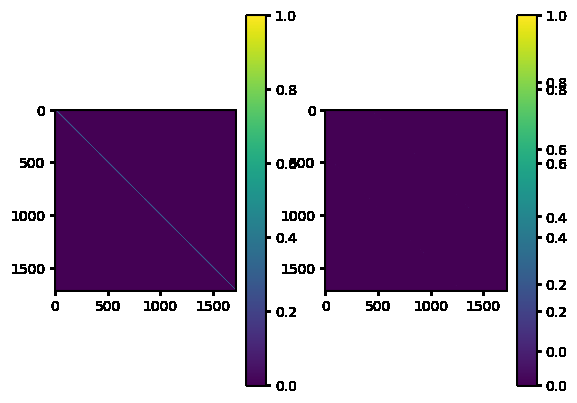

In [315]:
import numpy as np
import matplotlib.pyplot as plt

lams = [0.0, 0.05, 0.1, 0.25, 0.5, 1.0, 2.0, 5.0]
mus  = [0.0, 0.05, 0.1, 0.25, 0.5, 1.0, 2.0, 5.0]

# results
V_grid = [[None for _ in mus] for _ in lams]          # store solutions if you want
err    = np.zeros((len(lams), len(mus)), dtype=float) # MSE over slices

for i, lam in enumerate(lams):
    for j, mu in enumerate(mus):
        V_grid[i][j], _, _ = solve_V_all_slices(
            adata_synthetic_temp, pd_B,
            lam=lam, mu=mu, time=None,
            outer_max=5, niter_max=int(1e3), tol=1e-5,
            eta=1e-3, verbose=False, preprocess=False,
            coupling=coupling
        )
        # average MSE over slices in `t`
        mse = 0.0
        for s in t:
            R = V_grid[i][j][s] - V_true_temporal[s]
            mse += np.mean(R*R)
        err[i, j] = mse / len(t)


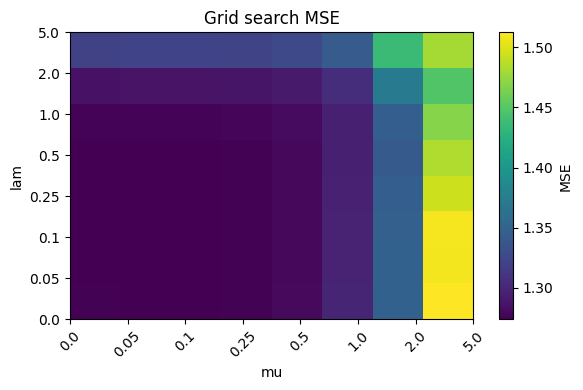

Best: 0.1 0.05 MSE: 1.2739863769398032


In [316]:
# quick view (rows: λ, cols: μ)
plt.figure(figsize=(6,4))
im = plt.imshow(err, aspect='auto', origin='lower',
                extent=[0, len(mus)-1, 0, len(lams)-1])
plt.colorbar(im, label='MSE')
plt.xticks(ticks=range(len(mus)),  labels=[str(m) for m in mus], rotation=45)
plt.yticks(ticks=range(len(lams)), labels=[str(l) for l in lams])
plt.xlabel('mu'); plt.ylabel('lam'); plt.title('Grid search MSE')
plt.tight_layout(); plt.show()

# best (λ, μ)
best_idx = np.unravel_index(np.argmin(err), err.shape)
best_lam, best_mu = lams[best_idx[0]], mus[best_idx[1]]
print("Best:", best_lam, best_mu, "MSE:", err.min())


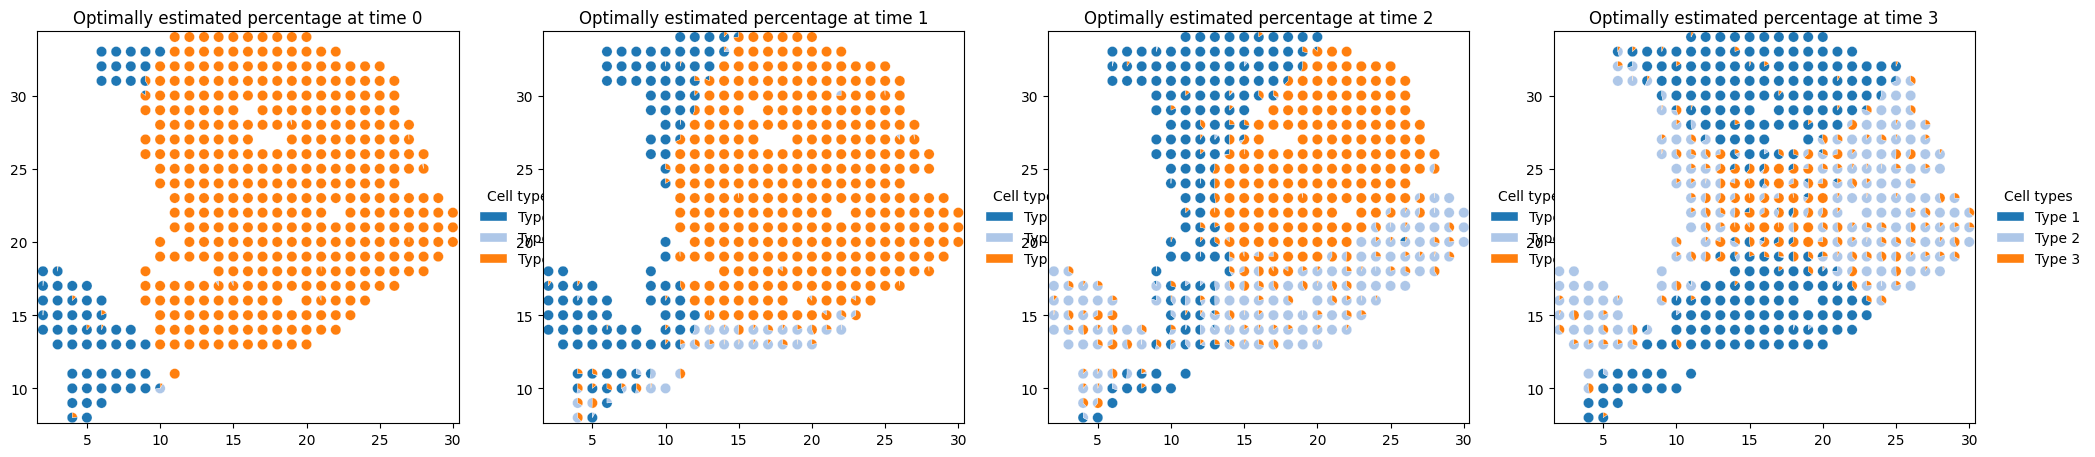

In [319]:
fig, axes = plt.subplots(1, 4, figsize=(25, 7))
# Left: estimated
for i in range(4):
    scatter_pies(
        axes[i],
        adata.obs['x'],
        adata.obs['y'],
        V_grid[best_idx[0]][best_idx[1]][i],
        labels=pd_B.index.to_list(),
        top_n=None
    )
    axes[i].set_title('Optimally estimated percentage at time '+str(i))
plt.show()